
The code for RPCMCI (rpcmc.py) was adapted from Tigramite (original authors: Elena Saggioro, Sagar Simha, Matthias Bruhns, Jakob Runge). We included functionality for missing data (Authors: Oana Popescu, Wiebke Günther). This adapted code for RPCMCI is published under the GNU General Public License v3.0.
This Colab notebook is published under the MIT license, as described below.

This project can also be found on Github: https://github.com/oanaucs/tutorial_RPCMCI_CCAI24


In [ ]:
# MIT License
#
#@title Copyright (c) 2021 CCAI Community Authors { display-mode: "form" }
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# CCAI Tutorial: Understanding drivers of climate extremes using regime-specific causal graphs
Author(s):
*   Oana-Iuliana Popescu, [1], oana-iulia.popescu@dlr.de
*   Wiebke Günther, [1], [2], wiebke.guenther@dlr.de
*   Raed Hamed, [3], raed.hamed@vu.nl
*   Dominik Schumacher, [4], dominik.schumacher@env.ethz.ch
*   Martin Rabel, [1], martin.rabel@dlr.de
*   Dim Coumou, [3], d.coumou@vu.nl
*   Jakob Runge, [2], [1], Jakob.Runge@dlr.de

[1] German Aerospace Center, Institute of Data Science, 07745 Jena, Germany\
[2] Technische Universität Berlin, 10623 Berlin, Germany\
[3] Institute for Environmental Studies, Vrije Universiteit Amsterdam, Amsterdam, Netherlands\
[4] Institute for Atmospheric and Climate Science ETH Zurich, Zurich, Switzerland


The climate system is intricate, involving numerous interactions among various components at multiple spatio-temporal scales. This complexity poses a significant challenge in understanding and predicting weather extremes within the Earth's climate system. However, a better understanding of the dynamics of such events is crucial due to their profound impact on ecosystems, economies, and worldwide communities. This tutorial will offer a comprehensive guide on using Regime-PCMCI (Saggioro et al., 2020), a constraint-based causal discovery technique, to uncover the causal relationships governing anomalous climate phenomena. Regime-PCMCI is designed to uncover causal relationships in time-series where transitions between regimes exist, and different causal relationships may govern each regime. In this tutorial, we will first discuss how to frame the problem of understanding climate and weather extremes using regime-specific causal discovery. We will shortly introduce constraint-based causal discovery and present the Regime-PCMCI algorithm. To enable participants to gain hands-on experience with the algorithm, we will apply Regime-PCMCI, implemented in the open-source Python package [Tigramite](https://github.com/jakobrunge/tigramite), to a real-world climate science problem. Our example will focus on validating hypothesized regime-specific causal graphs that describe the causal relationship between atmospheric circulation, temperature, rainfall, evaporation, and soil moisture under various moisture regimes. Our tutorial will cover essential steps such as data preprocessing, parameter selection, and interpretation of results, ensuring that all participants with a basic understanding of climate science or data analysis can grasp the presented concepts. With this tutorial, we wish to equip participants with the skills to apply Regime-PCMCI in their research to further uncover complex mechanisms in climate science, as this knowledge is crucial for more informed policy-making.

# Table of Contents

*   [Overview](#overview)
*   [Climate Impact](#climate-impact)
*   [Target Audience](#target-audience)
*   [Background & Prerequisites](#background-and-prereqs)
    1. [Causal discovery as a tool for understanding anomalous climate phenomena](#cd-intro)
    2. [Theoretical background](#theoretical-bg)\
      2.1 Probability and graph notions\
      2.2 Structural causal models\
      2.3 Constraint-based causal discovery for time-series data\
        2.3.1. Causal Discovery and Conditional Independence\
        2.3.2. PC algorithm\
        2.3.3. PCMCI algorithm\
        2.3.4. Causal assumptions and limitations\
      2.4 Regime-specific causal discovery\
        2.4.1. Defining anomalies using regime-specific causal graphs\
        2.4.2. The Regime-PCMCI algorithm\
*   [Software Requirements](#software-requirements)
    3. Installing packages and downloading data\
      3.1. Installing packages\
      3.2. The Tigramite package\
      3.3. Data Download
*   [Data Description](#data-description)
      4. Description of the soil moisture problem and the dataset for the hands-on example\
        4.1. Recap of the soil moisture problem\
        4.2. Description of the dataset\
        4.3. Introduction and intuition of the hypothesized causal graphs\
        4.4. Data preparations\
        4.5 Exploratory analysis: investigating data dependencies and lag functions
*   [Methodology](#methodology)
      5. Applying PCMCI and RPCMCI\
        5.1. PCMCI on the entire dataset
        5.2. Regime-PCMCI for constructing causal graphs for different moisture regimes\
        5.3 PCMCI on masked data based on VAC index
*   [Results & Discussion](#results-and-discussion)
      6. Results\
        6.1. PCMCI\
        6.2. RPCMCI\
        6.3. PCMCI on masked data
      7. Summary and discussion
*   [References and Resources for further learning](#references)
      8. References and further resources\
        8.1. References\
        8.2. Further resources

In [ ]:
# before we start, load our necessary files

!wget https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/raw/4770ecc8a404e10b0d5b22706b22c63b9245c709/to_download.zip -O file.zip

--2024-04-11 13:28:42--  https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/raw/4770ecc8a404e10b0d5b22706b22c63b9245c709/to_download.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oanaucs/tutorial_RPCMCI_CCAI24/4770ecc8a404e10b0d5b22706b22c63b9245c709/to_download.zip [following]
--2024-04-11 13:28:43--  https://raw.githubusercontent.com/oanaucs/tutorial_RPCMCI_CCAI24/4770ecc8a404e10b0d5b22706b22c63b9245c709/to_download.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23119 (23K) [application/zip]
Saving to: ‘file.zip’

file.zip            100%[===================>]  22.58K  --.-KB/s    in

In [ ]:
!unzip file.zip

Archive:  file.zip
  inflating: '3D-5-False-3-10-141-0.4-False-True-decisionTree-30years-10iterations-noevap-0.4-new_la_test'.npy  
  inflating: __MACOSX/._'3D-5-False-3-10-141-0.4-False-True-decisionTree-30years-10iterations-noevap-0.4-new_la_test'.npy  
  inflating: '3D-5-False-3-10-142-0.4-False-True-decisionTree-v1-mean-30years-10iterations-noevap-0.4'.npy  
  inflating: __MACOSX/._'3D-5-False-3-10-142-0.4-False-True-decisionTree-v1-mean-30years-10iterations-noevap-0.4'.npy  
  inflating: README.md               
  inflating: __MACOSX/._README.md    
  inflating: rpcmci.py               


<a name="overview"></a>
# Overview

Our goal in this tutorial is to show how we can use methods from constraint-based causal discovery to uncover the causal relationships that are present in different moisture regimes. In doing that, we aim to improve our general understanding of the dynamics of extreme events, with application to understanding drivers of soil-moisture under different, more extreme, regimes.

Our learning objectives are:
*   Framing the problem of understanding extremes from a causal perspective, in particular using regime-specific causal graphs.
*   Leveraging the existing Tigramite python package (https://github.com/jakobrunge/tigramite), specifically the Regime-PCMCI algorithm [Saggioro20] and masking functionality provided in this package to improve our understanding of climate extremes using causal inference.
*   Demonstrating the usefulness of these approaches to gain knowledge about how atmospheric circulation, temperature, rainfall, evaporation, and soil moisture interact under various moisture regimes.

<a name="climate-impact"></a>
# Climate Impact

Our climate has been warming rapidly in recent decades, with January 2024 marking the first 12-month period in which a global warming of 1.5 ℃ has been sustained [Copernicus24]. This rise in global mean temperature has been accompanied by a marked increase in the magnitude and/or frequency of weather and climate extremes such as heatwaves, droughts, heavy precipitation events and storms. It is precisely those extremes that manifest the changes in our Earth System in the most tangible manner, associated with a wide range of impacts on humans and entire ecosystems: Western Europe, parts of the United States and China and many other regions around the globe have experienced exceptionally hot and dry summers in the past years, causing drinking water shortages [Schumacher24], excessive heat-related mortality [Ballester23] that is expected to keep rising rapidly under additional global warming [Lüthi23], and inflicting crop failures [ArmadasBrás21], to name only a few concrete examples.

Crucially, so-called soil moisture–temperature feedbacks are thought to amplify hot extremes beyond greenhouse-gas induced global warming: warm air has a high evaporative demand, such that soil moisture is first rapidly depleted, and an increasing fraction of incoming shortwave radiation is then used to heat the air rather than evaporate water. In other words, warm air not only desiccates soils, but the resulting moisture deficits also drive up air temperatures. This positive feedback loop is most relevant in climate regimes that are neither dry nor humid; e.g., in much of western and central Europe, soils typically contain sufficient water to sustain high evaporation  — and hence limit surface sensible heating —  even in late summer, when soil moisture is lowest. This is referred to as the ‘moist regime’, i.e. evaporation is not restricted due to low soil moisture. In recent decades, however, summer soil moisture has decreased in much of Europe and elsewhere [Schumacher24], leading to increasingly frequent moisture limitations (‘dry regime’). Fuelled by this tendency, two-way interactions between dry soils and hot air kick in more often in recent summers than before, enabling even more extreme heatwaves than already implied by the human-induced global background warming.

There is little doubt about the presence of such soil moisture–temperature feedbacks, but due to the lack of observational data of both land surface fluxes and particularly the terrestrial sub-surface state (such as soil moisture), we strongly rely on climate and weather models to analyze these land–atmosphere interactions. Moreover, the relevant processes occur at scales far smaller than the grid spacing in current physical models, and are thus represented using physically informed yet still typically (semi-)empirical parameterizations. It is thus valuable to rely on alternative methods to analyze these land–atmosphere interactions; for example, climate models could potentially be benchmarked against observation-derived estimates, contributing to model improvements and ultimately enabling more accurate projections of both the mean climate and weather extremes. Similarly, insights gained from causal discovery could be useful in improving our understanding of physically plausible maximum temperatures under different ambient conditions (e.g., the highest possible near-surface temperature is not only dependent on the land surface state, but also on the vertical temperature and humidity structure of the troposphere).

In this tutorial, we thus uncover the causal drivers of soil moisture in Western Europe using an observation-based dataset routinely used in climate science. Specifically, we attempt to unravel the causal network that governs the evolution of air temperature under both the ‘wet’ and ‘dry’ regimes. This marks a first step towards an additional, and ultimately less (climate) model-dependent line of evidence on how low soil moisture exacerbates hot extremes. In the future, this could be further exploited for potentially generating robust predictors (according to the invariance principle, which states that causal predictors are more robust against distributional shifts [Peters17]). The memory of soil moisture has already been exploited to show skill improvements at sub-seasonal timescales through physical models [Orth14], and there is a lot of momentum to harvest this predictability using machine learning approaches (e.g., HEAT project). Improved forecasting enables better preparedness and mitigation strategies. Policymakers and planners can then rely on these forecasts to make informed decisions regarding climate policies, disaster preparedness, and resource allocation.      

Therefore, our tutorial has the goal of encouraging climate scientists and scientists from the machine learning community to use regime causal discovery to explore the dynamics behind heatwaves. This tool could also contribute to improved predictability of other extreme events, such as floods, for example through clever combinations of local and non-local predictors. By providing a first application based on actual climate data, we aim to make a broader contribution towards improved scientific understanding of both our warming climate systems and the increasingly extreme events that it fosters.   




<a name="target-audience"></a>
# Target Audience

Our tutorial is directed at, but not restricted to, the following audience:

* Climate scientists, researchers, and students in disciplines such as environmental science, meteorology, geography, or related fields who are interested in exploring methods for understanding weather extremes and climate phenomena.
* Data scientists and analysts looking to apply their data science, machine learning, and causal discovery skills to climate-related data.
* Policy makers and environmental planners who need a deeper understanding of the causal mechanisms behind climate phenomena to inform decision-making.



#### Prerequisites
We estimate the **ML difficulty level** to be **intermediate**, i.e. knowledge of basic ML concepts is required.      
We estimate the **climate difficulty level** to be **beginner-friendly**, i.e. little to no background in climate is needed.

This means, participants with the following background knowledge should be able to engage deeply with the tutorial content:

* Basic understanding of climate science: Familiarity with climate and weather concepts, including knowledge of atmospheric phenomena is helpful.
* Fundamentals of data analysis: Experience with data analysis, including knowledge of basic statistical concepts is needed.
* Causal inference concepts: The tutorial will introduce key concepts in causal inference, in both a formal and informal manner. Previous knowledge of causal inference concepts will be helpful. We also encourage users with a deeper interest in causal inference to consult the additional resources.
* Time-series analysis: Since the tutorial deals with time-series data, knowledge of time-series concepts will be helpful.
* Python programming skills: As the tutorial involves using the Tigramite package, proficiency in Python and Python libraries for data analysis is important.            


<a name="background-and-prereqs"></a>
# Background & Prerequisites

<a name="cd-intro"></a>
### 1. Causal discovery as a tool for understanding anomalous climate phenomena

Causal discovery can serve as a powerful tool for unraveling the drivers of anomalous climate phenomena. By applying causal discovery methods, researchers can identify the underlying causal relationships between various climate variables, allowing them to discern the factors contributing to unusual weather patterns, extreme events, or shifts in climate behavior.

Classical machine learning methods (ML), as well as deep learning (DL) methods, i.e., from simple linear regression and decision trees to complex deep learning models, usually focus on prediction or classification by learning a function from input data that can make predictions about unseen data. These methods usually leverage correlations between variables to make accurate predictions, with the goal to optimize some performance metric, such as accuracy, precision, recall, or the area under the ROC curve.

Causality is concerned with understanding the cause-effect relationships between variables. It seeks to answer questions not just about whether two variables are associated, but whether one variable causally influences another. This involves identifying causal mechanisms, estimating the effect of interventions, and making counterfactual predictions (what would happen to one variable if another variable were changed, all else being equal). Compared to ML/DL methods, causal inference methods often rely on a mix of observational data, assumptions about the data-generating process, and, when available, experimental data. However, both ML and causality rely on a set of statistical tools like regression and prediction models and statistical tests.

Compared to using ML methods only, understanding anomalous climate phenomena through causal discovery not only aids in predicting and explaining these occurrences but also informs more effective climate change adaptation and mitigation strategies. The gained knowledge can enable scientists to pinpoint key drivers and their interconnections, contributing to a more nuanced comprehension of the dynamic and interconnected nature of Earth's climate system.

<a name="theoretical-bg"></a>
## 2. Theoretical background

### 2.1. Probability and graph notions

Throughout this tutorial, we will need the following definitions:

* We denote $P_X$ the distribution of the $d$-dimensional random vector $X$.

* $p(x)$ denotes the density (pdf or pmf) of $P_X$ evaluated at $x \in \mathbb{R}^d$.

* $p(x_A | x_B)$ denotes the conditional density of $P_{X_A | X_B = x_B}$ evaluated at $x_A$, where $A, B \subseteq \{1, \ldots, d\}$ and $p(x_B) > 0$.

* We call $X$ independent of $Y$ and write $X \perp Y$ iff for all $x, y \in \mathbb{R}$, $p(x, y) = p(x)p(y)$.

* We call $X_1, \ldots, X_d$ jointly independent iff for all $x_1, \ldots, x_d \in \mathbb{R}$, $p(x_1, \ldots, x_d) = p(x_1) \cdot \ldots \cdot p(x_d)$.

* We call $X$ independent of $Y$ conditional on $Z$ and write $X \perp Y | Z$ iff for all $x, y, z$ where $p(z) > 0$,
$p(x, y | z) = p(x | z)p(y | z)$.

* A graph $G = (V, E)$ consists of vertices (nodes) $V = \{1, \ldots, d\}$ and edges $E \subseteq V \times V$. For the causal graphs we deal with in this tutorial, the following constraints and definitions apply:

   * There is at most one edge between every pair of vertices.
   * Two vertices are adjacent if there is an edge between them.
   * If all edges are directed (i.e., $i \rightarrow j$), the graph is called directed.
   * A path between $i$ and $j$ is a sequence of distinct vertices $(i, \ldots, j)$ such that successive vertices are adjacent.
   * A directed path from $i$ to $j$ is a path between $i$ and $j$ where all edges are pointing towards $j$, i.e., $i \rightarrow \cdots \rightarrow j$.
   * A cycle is a path $(i, j, \ldots, k)$ plus an edge between $k$ and $i$.
   * A directed acyclic graph (DAG) is a directed graph without directed cycles.


### 2.2. Structural causal models

Moving forward, we introduce Structural Causal Models (SCMs). These models serve as the backbone for causal inference, enabling us to represent and systematically dissect the causal mechanisms underlying complex phenomena and systems. As mentioned previously, the use of SCMs is one of the main difference between the causal inference framework and ML/DL methods.

#### Definition: Structural Causal Model (SCM)
A Structural Causal Model (SCM) is a mathematical framework that is used to represent and analyze the causal relationships between variables. An SCM consists of a set of structural equations and a distribution over so-called exogenous and endogeneous variables. An exogenous variable is external and not influenced by other variables in the system, while an endogenous variable is influenced by other variables within the system.

The SCM describes how each endogenous variable $X_i$ is generated by its direct causes, also called parents and denoted $Pa(X_i)$. The parents of $X_i$, say $X_j$, can be other endogeneous or exogeneous variables. Each variable $X_i$ is also caused by some exogenous noise $U_i$ specific only to $X_i$.

An SCM is defined by a tuple $M = \langle \mathbf{U}, \mathbf{X}, \mathbf{F}, P(\mathbf{U}) \rangle$, where:
* $\mathbf{U}$ is a set of exogenous variables that are determined by factors outside the model
* $\mathbf{V}$ is a set of endogenous variables that are determined by variables within the model
* $\mathbf{F}$ is a set of functions $\{f_1, f_2, \ldots, f_n\}$ such that each $f_i$ corresponds to a variable $X_i \in \mathbf{X}$ and defines $X_i$ as a function of some subset of $\mathbf{U} \cup \mathbf{V} \setminus \{X_i\}$, specifying how $X_i$ is generated from its direct causes
* $P(\mathbf{U})$ is a probability distribution over the exogenous variables, representing the uncertainty about the external factors influencing the model

Each structural equation in $\mathbf{F}$ takes the form

$$ X_i = f_i(\text{Pa}(X_i), U_i)$$

where $\text{Pa}_{X_i}$ are the parents (direct causes) of $X_i$ in the model, and $U_i$ is the exogenous noise associated with $X_i$.



### 2.3 Constraint-based causal discovery for time-series data

#### 2.3.1. Causal Discovery and Conditional Independence

As previously mentioned, in causal inference we assume that the observed data is generated from an SCM. The goal of causal discovery is to recover the SCM from observational and/or interventional data. Effectively, the goal of causal discovery is to recover the parents of each variable, i.e. $\text{Pa}(X_i)$ for all $i$ in the dataset.

We exemplify with a simple example. Assume we have obtained a dataset of daily records of ice cream sales $X$, the number of drowning incidents $Y$, and the temperature $Z$. When analyzing the data, we notice the following strong unconditional dependencies: There's a significant positive correlation between ice cream sales and the number of drowning incidents, and there's also a significant positive correlation between ice cream sales and temperature. Here comes the difference between causality and ML/DL approaches: A naive interpretation based on correlation might suggest that increasing ice cream sales lead to more drowning incidents. A predictor of drowning incidents using ice cream sales might thus perform almost perfectly on our dataset... but only for summer.

The interpretation using correlations does not consider the underlying causal structure and confounding variables. If we control for temperature, we might find that the correlation between ice cream sales and drowning incidents disappears, indicating that they are conditionally independent given temperature. This suggests that temperature is a confounding variable that affects both ice cream sales and drowning incidents, i.e., temperature is a common cause of both increased ice cream sales and increased drowning incidents. Therefore, a predictor using the temperature will probably perform well for all seasons of the year, as it is the true cause of drowning incidents.

This has been conceptualized as the Reichenbach’s common cause principle, which states that if two random variables (or sets of variables) $X$ and $Y$ are correlated and the data is unbiased, then the possible explanations for the correlation are as follows:

1. $X$ is either the cause of $Y$, or
2. $Y$ is the cause of $X$, or
3. there is a common cause $Z$ that causes both $X$ and $Y$.

#### Definition: D-separation

To relate SCMs to statistical dependencies, and thus be able to employ SCMs for describing data, there are two more conditions that we must impose. First, the Causal Markov Condition states that statistical dependencies emerge from causal relations. The converse of the Markov assumption is the Faithfulness assumption, which states that statistical independencies in the distribution imply graphical d-separation in the graph. If both the Causal Markov and the Faithfulness conditions are fulfilled, we get the direct relation between causal connections in the graph and statistical dependencies in the data, which lies at the foundation for the causal discovery algorithms that we will use in the tutorial.

D-separation (short for "directional separation") is an important concept in the study of causal inference. It provides a criterion for determining whether a set of variables can provide evidence of independence between other sets of variables in a graph, based on the DAG.

In a DAG, two sets of nodes $X$ and $Y$ are said to be d-separated by a set of nodes $Z$ if for every path between any node in $X$ and any node in $Y$, at least one of the following conditions holds:
* The path contains a chain $i \rightarrow m \rightarrow j$ or a fork $i \leftarrow m \rightarrow j$ where the middle node $m$ is in $Z$.
* The path contains an inverted fork (collider) $i \rightarrow m \leftarrow j$ where the middle node $m$ is not in $Z$, and no descendant of $m$ is in $Z$.

If all paths between $X$ and $Y$ are blocked by $Z$, then $X$ and $Y$ are conditionally independent given $Z$.

#### Example: D-separation

We give now three examples of d-separation:

<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/chain.png?raw=1" alt="chain" width='200'/> - here, $X \not \perp Y$ and $X \perp Y | Z$ hold

<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/collider.png?raw=1" alt="colider" width='150'/> - here $X \perp Y$ and  $X \not \perp Y | Z$ hold

<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/confounder.png?raw=1" alt="confounder" width='150'/> - here,  $X \not \perp Y $ and $X \perp Y | Z$ hold


In this tutorial, we will focus on constraint-based causal discovery methods, and refer readers to [Peters17] for an overview of different types of causal discovery methods. Constraint-based causal discovery uses statistical tests for conditional independence to uncover whether variables (or sets of variables) $X$ and $Y$ are causally linked. If no dependence is found, that is, the two are statistically independent, then the Faithfulness condition tells us that there is no causal relationship. If they are not independent, then we wish to identify the causal structure behind this dependence. They rely on three basic graphical structures that have been already introduced when explaining d-separation. The are named chains, forks, and colliders, and are defined as follows:

Chain Structure: Here, $Z$ is placed in the middle of a causal chain, indicating that $X$ causes $Z$, and $Z$ causes $Y$. The chain structure illustrates how an effect can be mediated through an intermediate variable.


 <img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/chain.png?raw=1" alt="chain" width='200'/>

Collider Structure: In this structure, $Z$ acts as a collider, where paths from $X$ and $Y$ collide. This means $X$ and $Y$ both cause $Z$, but there is no direct causal path between $X$ and $Y$. The collider structure has the important property that conditioning on $Z$ can introduce a statistical association between $X$ and $Y$ even if they are independent in the absence of conditioning. This specific property allows deductions on orientations, not just the skeleton, as we will see below. This will make colliders a core ingredient of (partially) *directed* graph-discovery as described in the edge-orientations below.

<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/collider.png?raw=1" alt="colider" width='150'/>

Confounder Structure: In this configuration, $Z$ acts as a common cause (or confounder) of both $X$ and $Y$, creating an association between them even if there is no direct causal path between $X$ and $Y$. For this structure, it is important to control for confounding variables to accurately estimate the causal effect between $X$ and $Y$.

<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/confounder.png?raw=1" alt="confounder" width='150'/>

#### 2.3.2. PC algorithm

The constraint-based causal discovery method that we will use is a variant of the PC algorithm [Spirtes93], named after its creators, Peter Spirtes and Clark Glymour. This method is designed to infer a DAG representing the causal structure from observational data using conditional independence tests to test the conditional dependencies in the data. Then, the PC algoritms uses the above-mentioned three basic graphical structures to orient links in the graph.

While the reader could skim or skip this section, we give here an intuition of how the PC algorithms works, as we believe it is helpful in better understanding the outcome of these algorithms. We therefore summarize the algorithm into the following steps:

1. **Initialization**:

    - Begin with a complete undirected graph on the set of variables, indicating potential causal relationships between all pairs.
    
2. **Conditional Independence (CI) Tests**:

   - Perform CI tests between all pairs of variables $(X_i, X_j)$ given a set $Z$ of other variables.

   - If $X_i$ and $X_j$ are conditionally independent given $Z$, **remove the edge** between them.

   - Increment the size of $Z$ and repeat until all pairs have been tested or $Z$ includes all variables.

      
3. **Edge Orientation**:

    - Using the pruned undirected graph, determine the direction of edges by identifying **collider-structures** (also known as v-structures) and applying rules to avoid cycles.

    - Resulting edges are directed where possible, respecting the identified conditional independencies.

    - Continue iterating until no further edge orientations can be inferred.

    - For an intuitive explanation of the orientation rules, see [RungeMediumPt6]

##### Note

It is not always possible to infer the complete DAG. Certain causal structures are observationally equivalent; that is, they produce the same set of conditional independencies in the data. In such cases, the PC algorithm cannot distinguish between these structures based solely on the data. Then, the PC algorithm cannot orient all edges, and thus outputs the **CPDAG (Completed Partially Directed Acyclic Graph)**. The CPDAG represents the Markov equivalence class of DAGs consistent with the observed data. A key characteristic of Markov equivalent DAGs is that they have the same skeletons (the underlying undirected graph obtained by ignoring the direction of the edges) and the same sets of unshielded colliders.

#### 2.3.3. PCMCI algorithm

Now, we turn our focus to the PCMCI causal discovery algorithm [Runge19], which is specifically tailored to time series data. It integrates the PC algorithm with Momentary Conditional Independence (MCI) tests which helps to improve recall, especially when dealing with highly autocorrelated data.

Because we are now in the time series setting, PCMCI accounts for time-delayed causal effects. A time-delayed causal effect means that if change the value of the cause at time-step $t-\tau$, where $\tau$ is the time lag (e.g. a time lag of 5 steps is $\tau=5$), the impact of this change would affect the effect at a later point in time $t$.

The PCMCI algorithm consists of the following steps:

1. **Condition selection**:

   - Perform CI tests adapted for time series to determine if there is an edge from $X_i^{t-\tau}$ to $X_j^t$. As with the PC algorithm, an edge between the two variables is there if $X_i^{t-\tau}$ is not conditionally independent of $X_j^t$, but now we include the past values of the process excluding $X_i^{t-\tau}$ (with $\tau > 0$) as a condition, to account for autocorrelation.
   
   - Using these CI tests, esimate a set of parents for each variable at each time lag.

3. **Momentary Conditional Independence (MCI) Tests**:

   - For each variable $X_{j}^{t}$, test causal links between variable pairs $(X_{i}^{t-\tau}, X_{j}^{t})$ for $X_i$ within the parents set and all time lags $\tau \in \{ 1, ..., \tau_{\text{max}}\}$, with $\tau_{\text{max}}$ predefined.

   - A causal link $X_{i}^{t-\tau} \rightarrow X_{j}^{t}$ is established if $X_{i}^{t-\tau}$ is not conditionally independent of $X_{j}^{t}$ after conditioning on the identified parents, excluding $X_{i}^{t-\tau}$.

   - For $\tau = 0$, contemporaneous links are treated as undirected unless other techniques determine their directionality.
   
3. **Graph generation**:

   - Use the PC algorithm on the obtained set of dependencies to construct a directed graph representing causal relationships.

   - Orient edges in the graph based on the temporal information and the results of CI and MCI tests.

#### 2.3.4. Causal assumptions and limitations

When applying these algorithms, it is important for users to consider the assumptions underlying a causal interpretation of the outcome of the algorithms. We therefore list below the assumptions made by the PC and PCMCI algorithms. A discussion of how these assumptions might be violated for our specific use-case can be found in the discussion of the results.

  - **Faithfulness / Stability:** *Independencies in data arise not from coincidence, but rather from causal structure* or, expressed differently, *If two variables are independent given some other subset of variables, then they are not connected by a causal link in the graph*.
  - **Causal Sufficiency:** *Measured variables include all of the common causes.*
  - **Causal Markov Condition:** *All the relevant probabilistic information that can be obtained from the system is contained in its direct causes* or, expressed differently, *If two variables are not connected in the causal graph given some set of conditions (see Runge Chaos 2018 for further definitions), then they are conditionally independent*.
  - **No contemporaneous effects:** *There are no causal effects at lag zero.*
  - **Stationarity:** *Within one regime, the statistical properties of the time series (mean, variance, and covariance) are constant over time.*
  - **Parametric assumptions of independence tests** used, if any assumptions can be met. Preferably, if assumptions about the relationships and distributions can be met, a parametric test is preferred, as they typically have higher power than non-parametric tests. However, it is not always possible to make valid assumptions. In that case, users can choose a non-parametric test, at the risk of losing power of the CI test.

The algorithms we use also suffer from limitations, and we mention some of these below. In the discussion, we also mention limitations and how to address them.

- Sensitivity to the correctness of conditional independence tests.
- The need for large sample sizes and accurate measurements.
- The assumptions of no hidden confounders and faithfulness may not always hold true, potentially leading to incorrect inferences. This might happen, if not all relevant variables can be measured.



### 2.4 Regime-specific causal discovery

We now move on to the special case of regime-specific causal discovery. First, we discuss the intuition behind regimes. Then, we present the Regime-PCMCI algorithm [Saggioro20], which adapts the PCMCI algorithm to discover regime-specific causal graphs. This section is most relevant to the reader, as it describes the algo\
n the code below.

#### 2.4.1. Defining anomalies using regime-specific causal graphs

In the context of time series analysis, regimes are distinct periods within the data during which the data exhibits different statistical patterns. Understanding and identifying regimes is crucial because the causal dynamics can vary significantly across these different states. The differences between regimes could be due to changes in underlying processes, external influences, or shifts in system dynamics. Thus, each regime is characterized by its own set of statistical properties. These properties may change abruptly or gradually at the onset of a new regime. The transition from one regime to another is known as a regime shift. These shifts can be sudden, like a stock market crash, or gradual, like climate change. In this tutorial, we will focus on a system with finitely many, discrete regimes.

Ignoring regime shifts can lead to misleading conclusions in causal analysis. A relationship observed over the entire time series may not accurately represent the relationships within each regime. One simple (albeit not very realistic) example of when observing over an entire time series is problematic is when the assumption of faithfulness is broken due to the fact that in one regime, there is a positive correlation between the data of $+a$, while in the second regime, the correlation of the  data is $-a$. For both regimes having data that are Gaussian, and assuming that the individual regime sample sizes are similar, the overall correlation will be close to 0. However, there is clearly a dependence between the two variables.

### Definition: Regime-specific SCM

An intuitive interpretation of data with distribution shifts such as anomalies / extremes is that the underlying, "normal" causal structure or causal mechanisms are changing, resulting in differnt regimes governing the "normal" and "anomalous" state (in our case, the dry / wet regimes). For example, the parents of variables change from one regime to the other, and/or the strength and function of their dependencies.

A straight-forward way to design a model that follows this hypothesis is to model each regime individually using a regime-specific SCM instead of defining only one SCM. In other words, for the $k$-th regime with $k=1, \ldots, K$ where $K$ is the number of regimes (potentially $K=\infty$) we define the SCM
   
$$ \mathbf{X}_{k,t} := \mathbf{f}^k({Pa}^k(\mathbf{X}_t), \mathbf{u}_{k,t}), $$

where the noise variables $u_{k,t}$ are jointly independent and identically distributed. We assume the same variables being present in each regime and additivity. Modelling regime-dependence in this way has been done in literature, some examples are [Saggioro20, Strobl22, Varambally23, Assaad23].
     
In this interpretation, we assume that the regime shifts that lead to the change in distribution are exogeneous, i.e., regime shifts arise due to external factors and are *not* triggered by variables in the system. At first sight, it might seem unreasonable to assume this in our problem setting of soil-moisture regimes, as these are obviously influenced by previous precipitation events and temperature. However, we are still able to justify this assumption in our setting since the regime shift can only be influenced by *previous* states of the system. We are assuming only lagged relationships from any variable in our system under investigation on the regime shift. In this sense, the regime shift is exogenous to the system at the current time step.

### Example: Regimes

Let's now look at an example of a system with regime-specific causal graph taken from the [Tigramite documentation](https://github.com/jakobrunge/tigramite/blob/master/tutorials/causal_discovery/tigramite_tutorial_regime_pcmci.ipynb). Here, we have three variables $X_1, X_2, X_3$ governed throughout the year by two distinct regimes: summer and winter, highlighted in black for winter and gray for summer.

<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/timeseries_regimes.png?raw=1"> [Image from  [Tigramite documentation](https://github.com/jakobrunge/tigramite/blob/master/tutorials/causal_discovery/tigramite_tutorial_regime_pcmci.ipynb)]

If we ignore the regimes and learn a graph over all data, we find that $X_1$ is a parent of both $X_2$ and $X_3$:

<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/bothregimes.png?raw=1" width=300> [Image from  [Tigramite documentation](https://github.com/jakobrunge/tigramite/blob/master/tutorials/causal_discovery/tigramite_tutorial_regime_pcmci.ipynb)]

But if we include the regime information, we find that in winter actually $X_1$ is only a parent of $X_2$ and **not** of $X_3$ in this regime.

<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/solution_regimes.png?raw=1" width=800> [Image from  [Tigramite documentation](https://github.com/jakobrunge/tigramite/blob/master/tutorials/causal_discovery/tigramite_tutorial_regime_pcmci.ipynb)]





### 2.4.2. The Regime-PCMCI algorithm

Regime-PCMCI [Saggioro20] (RPCMCI) combines the PCMCI algorithm with an optimization-based procedure to discover regime-shifts. To use RPCMCI, we assume there exists an exogeneous variable $R$ which influences all the measured variables, and describes the $N_K$ regimes that can occur, which should be known beforehand by the user. The goal of RPCMCI is to find a regime assignment vector for each sample in the dataset which indicates to which regime $k$ the corresponding sample belongs. For this, it alternately iterates between two steps: learning causal graphs for samples that belong to a regime $k$, and then improving the sample split between the different regimes.

In more detail, the two steps work as follows, and are depicted as in the figure below:

1. **Discovering regime-specific causal graphs**: In the first step, the PCMCI algorithm is applied separately within each regime to obtain regime-specific graphs. In the first iteration, a random assignment of regimes is used.

2. **Detecting regimes**: In the second step, we optimize the labels of the regime shifts in the time series data. This is done using the result from the first step. Using the estimated parents for regime $k$ and the samples for which the regime $r$ is active, a function is fitted to predict the value $\hat{x}_{i, k, t}$ at time step $t$ for each $i$-th node $x_{i, t}$. Then, the distance between the real and predicted data is used for the new iteration to optimize the regime assignment.

<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/rpmci.png?raw=1" width=800>

#### Constraints on $\gamma$

The $\gamma_k(t)$ factors are used to assign the most likely regime at time step $t$ among the total $N_K$ regimes, and only one regime can be assigned. Therefore, $\gamma_k(t) \in [0, 1]$ with the constraint that $\sum_{k=1}^{N_K} \gamma_k(t) = 1$, for all $t$, where $N_k$ is the total number of regimes.

RPCMCI strongly relies on the assumption of persistence. Persistence holds when the causal graph and the functional dependence are stationary for an average $N_M$ of consecutive time steps (besides the assumptions that the number of regimes $N_K$ is finite). Because of this, another constraint that $\gamma$ has to fulfill is that each regime has to have an average regime duration of $N_M$. Thus, for all regimes, the average regime switching time is given approximately by $s = T / (N_M \cdot N_K)$, with $T$ being the total time steps. Here, $s$ is expected to be known, e.g., from expert knowledge.

#### Final definition of the optimization problem

We thus formally define the optimization problem by taking the sum over all time steps and variables and searching for a $\gamma$ that minimizing the objective function for the entire time-series $x_t \in \mathbb{R}^{N_X}$ with $t \in [0, T]$ :

   $$\operatorname{argmin}_{\gamma} \sum_{k=1}^{N_K} \sum_{t=1}^T \gamma_k(t) || x_t - \hat{x}_{k,t}^q ||_2^2$$

Here, $\hat{x}_{k,t}^q = \hat{G}_t(P_{k}, \Theta_{t})$ is the predicted value at iteration $q$ in regime $k$ using the parents $P_{k}$ of variables in $X$ at regime $k$ (note that each variable may have a different parents set $P_{X_i, k}$) using the functional with parameters $\Theta_t$. This objective function is subject to the following constraints:

   $$ (1) \sum_{k=1}^{N_K} \gamma_{k}(t) = 1 \quad \forall t $$
   
   with $\gamma_{k}(t) \in [0, 1]$ and

   $$ (2) \sum_{t}^{T-1} | \gamma_{k}(t+1) - \gamma_{k}(t)| \leq N_C$$

To choose $\hat{G}_t(P_{k}, \Theta_{t})$, we have to use a model that fits our assumptions about the data distributions and relationships, i.e., if we assume that variables have a linear relationship, we can use linear regression. If we assume non-linear relationships, we must use adequate models such as decision trees, k-nearest neighbors, or even neural network regressors.





<a name="software-requirements"></a>
# Software Requirements

<a name="install"></a>
## 3. Installing packages and downloading data

### 3.1. Installing packages

This notebook requires Python >= 3.9. We first test the version, it's 3.10 so we do not downgrade.
To install the packages required and load them, run the following cells.

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip3 install numba==0.56.4  matplotlib==3.8.0 networkx==3.1 numpy==1.23.5 pandas==2.1.4 scikit-learn==1.3.0 scipy==1.11.4 seaborn==0.12.2 ortools==9.8.3296 gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 31.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf

In [ ]:
!wget https://github.com/jakobrunge/tigramite/archive/refs/heads/master.zip

--2024-04-11 13:30:23--  https://github.com/jakobrunge/tigramite/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/jakobrunge/tigramite/zip/refs/heads/master [following]
--2024-04-11 13:30:23--  https://codeload.github.com/jakobrunge/tigramite/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [        <=>         ]  24.22M  14.6MB/s    in 1.7s    

2024-04-11 13:30:25 (14.6 MB/s) - ‘master.zip’ saved [25398502]



In [ ]:
# unzip the Tigramite folder - necessary for installation
!unzip master.zip

Archive:  master.zip
8e7c7f1a81b29f0ab7adec2885654b7592f0d394
   creating: tigramite-master/
  inflating: tigramite-master/.gitignore  
  inflating: tigramite-master/.travis.yml  
  inflating: tigramite-master/FUNDING.yml  
  inflating: tigramite-master/README.md  
   creating: tigramite-master/docs/
 extracting: tigramite-master/docs/.nojekyll  
  inflating: tigramite-master/docs/Makefile  
  inflating: tigramite-master/docs/Pipfile  
  inflating: tigramite-master/docs/Pipfile.lock  
   creating: tigramite-master/docs/_build/
  inflating: tigramite-master/docs/_build/.buildinfo  
   creating: tigramite-master/docs/_build/.doctrees/
  inflating: tigramite-master/docs/_build/.doctrees/environment.pickle  
  inflating: tigramite-master/docs/_build/.doctrees/index.doctree  
 extracting: tigramite-master/docs/_build/.nojekyll  
   creating: tigramite-master/docs/_build/_images/
   creating: tigramite-master/docs/_build/_images/math/
  inflating: tigramite-master/docs/_build/_images/math/00

In [ ]:
# temporarily change directory
%cd tigramite-master

/content/tigramite-master


In [ ]:
# install Tigramite
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
 

In [ ]:
# go back to root dir
%cd ..

/content


# Important! Now please restart session!

In order for all packages to work, we need now to restart the session. For this, go to the options bar, and select Runtime -> Restart Session. Then you can continue with the cell below, no need to rerun the cells above this text.

### Now we can start working!

Let's load some necessary packages:

In [ ]:
# imports
import copy

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data manipulation
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from datetime import datetime, timedelta

# Metrics and Evaluation
from sklearn.metrics import confusion_matrix

## 3.2. The Tigramite package
This tutorial mainly rests on the [Tigramite package](https://github.com/jakobrunge/tigramite/tree/master). Tigramite is a Python package that provides various causal discovery algorithms based on the PCMCI framework suitable for time series data under different sets of assumptions. The provided algorithms can be flexibly combined with various CI test, many of which are also provided in Tigramite. Besides causal discovery, Tigramite also provides functionality to estimate (conditional) causal effects based on a given causal graph. Since this is the main requirement, we will go over the relevant parts of Tigramite and how to set them up in more detail in the next section.

First, we need to import the relevant functions from Tigramite:
  - the ``PCMCI`` class, which provides the PCMCI causal discovery algorithm;
  - the ``RPCMCI`` class, which provides the causal discovery algorithm that is also able to find suitable regime splits Regime-PCMCI;
  - the ``ParCorr`` conditional independence test, which we will use within the causal discovery algorithms;
  - the ``RobustParCorr`` conditional independence test, which we will use within the causal discovery algorithms;
  - and finally, some data_preprocessing and plotting functionality.

In [ ]:
# Data preprocessing and graph visualization
from tigramite import data_processing as pp
from tigramite import plotting as tp
# Causal discovery
from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.pcmci import PCMCI
from rpcmci import RPCMCI
import networkx as nx

### 3.3. Data Download

Now, we retrieve the dataset that we will use in our experiments from the XAIDA website. This is downloaded in the form of a CSV file.

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1kNZBz1ie-BVwwFF5W1kNikk1CjbTtZvu'
output = 'LAF_WWCE_SM_VAC_dtr_std_MAMJJAS.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1kNZBz1ie-BVwwFF5W1kNikk1CjbTtZvu
To: /content/LAF_WWCE_SM_VAC_dtr_std_MAMJJAS.csv
100%|██████████| 14.9M/14.9M [00:00<00:00, 78.2MB/s]


'LAF_WWCE_SM_VAC_dtr_std_MAMJJAS.csv'

<a name="data-description"></a>
# Data Description

<a name="sm-problem"></a>
## 4. Description of the soil moisture problem and the dataset for the hands-on example

### 4.1. Recap of the soil moisture problem


As described in the introduction, we hypothesize that weather and climatic relationships can vary based on background soil moisture conditions. Typically, temperature and soil moisture are negatively correlated in the climate system. Warmer air desiccates soils due to an increase in evaporative demand [Dirmeyer21]. When soil moisture becomes excessively dry, it can restrict evaporation (latent heat) via a number of bio-physical constraints (e.g., increase in soil suction, and plant stomatal resistance). This further exacerbates heat conditions as incoming energy is increasingly partitioned into sensible heat rather than latent heat [Seneviratne10]. We therefore assume that causal relationships differ between dry and wet soil moisture conditions and hence the need to distinguish these two different generative regimes.

### 4.2. Description of the dataset

To leverage regime specific causal discovery to disentangle the drivers of such events under both wet and dry regimes, we use a dataset which has been generated by Martin Hirschi, Dominik Schumacher and Raed Hamed within the XAIDA project, which aims to do attribution of extreme weather events, and can be found here [XAIDA reports and datasets](https://xaida.eu/reports-datasets/). The dataset includes the daily variables below.

- Mean air temperature 2m above the ground (T2m),
- Root-zone (1m) soil moisture (SM),
- Surface sensible heat flux (SH), sign swapped to obtain positive upward fluxes,
- Surface latent heat flux (LH), sign swapped as for SH,
- Stream function at 250 hPa (Stream), describing atmospheric circulation patterns,
- Shortwave downward radiation (SW),
- Precipitation (TP),
- An expert guided regime classification index, i.e. the vegetation-atmosphere coupling (VAC) index (https://doi.org/10.1002/2015GL066563) based on the co-occcurence of soil moisture and temperature anomalies using thresholding (See Figure below, left panel a).

The Vegetation-Atmosphere Coupling (VAC) index is presented at daily time-scale and is based on the 70th and 30th percentiles of SM and T2m variables respectively. Conversely, the VAC index is assigned to one of five possible categories such that:


<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/threshold_rules.PNG?raw=1" width=600>
    
  * 0 - normal regime,
  * a - moisture-limited regime with a tendency towards wetting
  * b - energy limited regime with a tendency towards drying
  * c - moisture-limited regime with a tendency towards drying
  * d - energy limited regime with a tendency towards wetting


Note that these categories should not be thought of as ground truth labels, but rather being (imperfect) indicators based on expert knowledge.

For this analysis, we use the ERA5 dataset for the 1950-2022 period [Hersbach20]. Here we pre-process the data in the following way:

- Data is spatially averaged over the western European domain (see below figure-right panel b).
- Data is detrended by removing the average annual trend from each single day.
- Data is standardized across the period of study.

<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/blob/main/figures/map_treshold_visual.PNG?raw=1" width=600>



### 4.3. Introduction and expectation of the hypothesized causal graphs

In a next step, we describe the expectation for the hypothesized causal graphs below, and how key relationships should vary based on our understanding of soil moisture regimes. This serves as a reference to help guide our interpretation and troubleshooting of the method.

Several physical mechanisms within the climate system lead to the co-variability between temperature and soil moisture. For example, a high pressure circulation pattern, which we represent here with the stream function, can favor warm temperatures and high solar radiation due to clear skies and subsidence [Röthlisberger23]. Such a circulation tends to prevent precipitation and is hence generally associated with decreasing soil moisture.
The total available energy at the land surface through (net) radiation is used for evaporation (latent heating) and to warm the near-surface air (sensible heating). Typically, for normal to wet soil moisture conditions, incoming radiation largely fuels evaporation, depleting soil moisture availability. Only during low soil moisture conditions is latent heating reduced, increasing the amount of energy partitioned into sensible heating and therefore temperatures.

Given all this, we assume that the stream function variable (stream) directly influences temperature, radiation and precipitation across regimes. Similarly, we assume that incoming radiation determines latent and sensible heat fluxes and that precipitation affects soil moisture across regimes.
Key differences between regimes relate to the absence of a feedback from soil moisture to latent heat during wet to normal conditions whereas we expect low soil moisture to reduce latent heat during dry conditions. Furthermore, we expect that reduced latent heat will favor energy partitioning into sensible heat further warming temperatures.


Thus, for the following variables
- Mean air temperature 2m above the ground (T2m),
- Root-zone (1m) soil moisture (SM),
- Surface sensible heat flux (SH), sign swapped to obtain positive upward fluxes,
- Surface latent heat flux (LH), sign swapped as for SH,
- Stream function at 250 hPa (Stream), describing atmospheric circulation patterns,
- Shortwave downward radiation (SW),
- Precipitation (TP),

we hypothesize a causal graph as depicted below.

<img src="https://github.com/oanaucs/tutorial_RPCMCI_CCAI24/raw/ee272128f01b5e541d5a86eb4a36d282e7011d2b/figures/hyp_graph.png" alt="Causal hypothesis" width='500'/>


### 4.4. Data preparations

In this section, we describe the necessary steps to arrive to a dataset to be used for causal discovery. We load the data and reshape the Pandas dataframe such that each variable is now in the shape of $[T, 1]$, where $T$ is the total number of time steps. We then use this data to generate a Tigramite dataframe, which we need later for the application of the PCMCI and RPCMCI algorithms. Tigramite dataframes also offer options for plotting the data, inspecting the correlations in the data and the time lags at which these happen, which are useful for perfoming exploratory analysis.

We now generate a new Pandas dataset from the original one using the ```reshape_and_resample_df``` dataset. There are two important points regarding the ```reshape_and_resample_df``` function:

 - First, we need to consider that our datasets contain data from only 7 months of the year. Remember that PCMCI tests for conditional independence with a time lag $\tau_{\text{max}}$. If we run PCMCI on the dataset as is, then we risk testing for conditional independence with $\tau$-s taken from different years. This can result in spurious or incorrect dependencies, and we want to ensure that we are avoiding any inconsistencies in handling the data. We thus fill in the missing values by placeholders-values, marking them as missing, but preventing overlaps between years as described above

 - Second, we apply an aggregation function to the data. In the original dataframe, we are given daily values. However, at the daily time-scale, there are many short-term effects that can appear as links in the graphs, which might make the interpretation of the graph more difficult. We therefore aggregate data points using the mean on a 3-day basis by setting ``sample_freq=3D`` and ``sampling_type=mean``. We have also implemented subsampling.

 To speed up computation, we are only taking the daily values from the last 30 years, from 1993 to 2022.

In [ ]:
def reshape_and_resample_df(filename, val_type='seasonal_dtr_val_std', sample_freq='3D', sampling_type='mean',
                            fill_missing=False, fill_missing_value=999., use_evap=False):
    # Load DataFrame
    df = pd.read_csv(filename)
    freq = int(sample_freq[0])

    # Convert 'VAC' values
    vac_conversion = {'a': 1, 'b': 2, 'c': 3, 'd': 4, '0': 0}
    df['VAC'] = df['VAC'].replace(vac_conversion).astype(float)

    # Pivot the DataFrame
    pivoted_df = df.pivot(index='date', columns='var', values=val_type)
    pivoted_df.index = pd.to_datetime(pivoted_df.index)

    # only keep years starting from 1990
    all_days_to_keep = np.arange(datetime(1993, 3, 1), datetime(2022, 9, 30),
                                 timedelta(days=1)).astype(datetime)
    dates_to_keep = [i for i in all_days_to_keep if i in pivoted_df.index]
    pivoted_df = pivoted_df.loc[dates_to_keep]

    if use_evap:
        pivoted_df['evap'] = pivoted_df['slhf'] / pivoted_df['slhf'] + \
        pivoted_df['sshf']

    # Extract and prepare 'VAC' column
    date_to_vac = df.drop_duplicates(subset='date').set_index('date')['VAC']
    date_to_vac.index = pd.to_datetime(date_to_vac.index)
    date_to_vac = date_to_vac.loc[dates_to_keep]

    if fill_missing:
        date_array = pivoted_df.index

        # fill in missing days with 999.
        filled_df = pd.DataFrame(fill_missing_value, index=all_days_to_keep,
                                 columns=pivoted_df.columns)
        filled_df.index = pd.to_datetime(filled_df.index).strftime('%Y-%m-%d')

        filled_vac_df = pd.Series(fill_missing_value, index=all_days_to_keep)
        filled_vac_df.index = pd.to_datetime(
            filled_vac_df.index).strftime('%Y-%m-%d')

        for day in filled_df.index:
            if day in date_array:
                filled_df.loc[day] = pivoted_df.loc[day]
                filled_vac_df.loc[day] = date_to_vac.loc[day]

        pivoted_df = filled_df
        date_to_vac = filled_vac_df

    # Resample data
    if sampling_type == 'mean':
        resampled = pivoted_df.copy().resample(sample_freq).mean().dropna()
        resampled_vac = np.round(
            date_to_vac.resample(sample_freq).median().dropna())
    elif sampling_type == 'subsample':
        # Assuming 'sample_freq' contains a valid integer for frequency
        resampled = pivoted_df.copy().iloc[::freq]
        resampled_vac = date_to_vac.iloc[::freq]
    else:
        raise ValueError('This type of sampling is not supported!')

    # Assign 'VAC' values to the resampled DataFrame
    resampled['VAC'] = resampled_vac

    return resampled

Now put everything together into the ```get_pandas_and_tigramite_dfs``` function that returns both the Pandas dataframe and the Tigramite dataframe. The function also returns the VAC values.

It is important to mention here that Tigramite takes on and will consistently handle missing values if we denote that these exist by coding them with a certain value. We denote the missing values as ``999.``. When creating the Tigramite datafram in ```get_pandas_and_tigramite_dfs``` can be flagged with ``DataFrame(..., missing_flag=999.)``. Then all time slices of samples where missing values occur in any variable are dismissed while consistently handling time lags.

In [ ]:
def get_pandas_and_tigramite_dfs(filename, val_type='seasonal_dtr_val_std', sample_freq='1D', sampling_type='mean',
                                 vals_to_drop=None, fill_missing=False, fill_missing_value=999., use_evap=False):
    # Reshape and resample DataFrame
    pd_df = reshape_and_resample_df(filename, val_type=val_type,
                                    sample_freq=sample_freq,
                                    sampling_type=sampling_type,
                                    fill_missing=fill_missing,
                                    fill_missing_value=fill_missing_value,
                                    use_evap=use_evap)

    vac_values = pd_df['VAC'].copy().to_numpy()

    # rename columns
    pd_df = pd_df.rename(columns={'slhf': 'LH',
                                  'sshf': 'SH',
                                  'swvl123': 'SM',
                                  't2m': 'T2m',
                                  'tp': 'TP',
                                  'stream': 'Stream',
                                  'ssrd': 'SW'})

    # Drop specified columns if provided
    if vals_to_drop is not None:
        pd_df.drop(vals_to_drop, axis=1, inplace=True)

    # Convert to new DataFrame with appropriate column names
    tig_df = pp.DataFrame(pd_df.to_numpy(), var_names=pd_df.columns, missing_flag=999.)

    return pd_df, tig_df, vac_values

We finally generate our datasets as follows. We generate two datasets, one with VAC values and one without them, in order to have a plot where VAC values are displayed as well.

In [ ]:
filled_pd_df, filled_tigramite_df, filled_vac_values = get_pandas_and_tigramite_dfs(
    './LAF_WWCE_SM_VAC_dtr_std_MAMJJAS.csv',
    sampling_type='subsample',
    sample_freq='3D',
    vals_to_drop=['swvl2', 'swvl3', 'swvl1', 'VAC'],
    fill_missing=True, fill_missing_value=999., use_evap=False)

In [ ]:
filled_pd_df_vac, filled_tigramite_df_vac, _ = get_pandas_and_tigramite_dfs(
    './LAF_WWCE_SM_VAC_dtr_std_MAMJJAS.csv',
    sampling_type='subsample',
    sample_freq='3D',
    vals_to_drop=['swvl2', 'swvl3', 'swvl1'],
    fill_missing=True, fill_missing_value=999., use_evap=False)

### 4.5 Exploratory analysis: investigating data dependencies and lag functions

To do exploratory analysis, we use the ``plot_timeseries`` function. To investigate the type of dependencies, i.e., whether they are linear or non-linear, we use the ``plot_scatterplots`` function. With the argument ``matrix_lags`` set to a ``(N, N)`` integer numpy array you can choose which lag to use for every pair of variables. Here it is left ``None``, implying lag zero.

Furthermore, we plot the lagged unconditional dependencies using the ``ParCorr`` test. This gives us information about which maximal time lag ``tau_max`` we could use in our causal discovery methods. A rule of thumb is to consider the lag at which the dependencies have roughly their maximal absolute value. In our case, the lags vary depending on the pair of variables in question, but ``tau_max = 5`` seems like a reasonable choice.

In [ ]:
def plot_timeseries_and_correlations(dataframe, tau_max=10):
    timeseries_fig, timeseries_axs = tp.plot_timeseries(dataframe, figsize=(8, 4), grey_masked_samples='data')
    parcorr = ParCorr(significance='analytic')
    pcmci = PCMCI(
        dataframe=dataframe,
        cond_ind_test=parcorr,
        verbosity=1)
    correlations = pcmci.get_lagged_dependencies(tau_max=tau_max, val_only=True)['val_matrix']
    matrix_lags = None
    tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags': matrix_lags})
    lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names': dataframe.var_names,
                                                                            'x_base': 5, 'y_base': .5})
    plt.show()


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 10


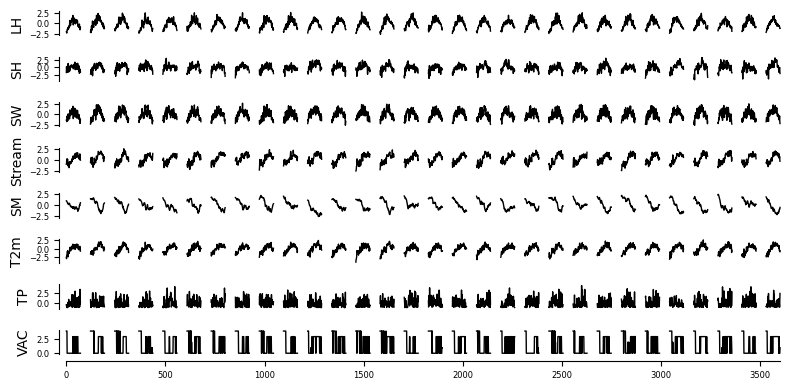

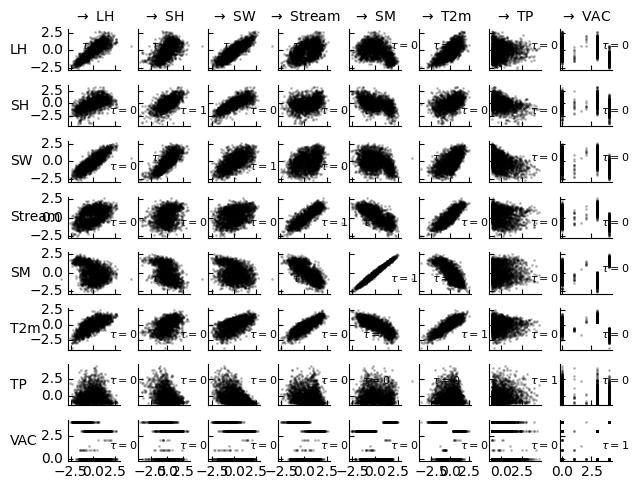

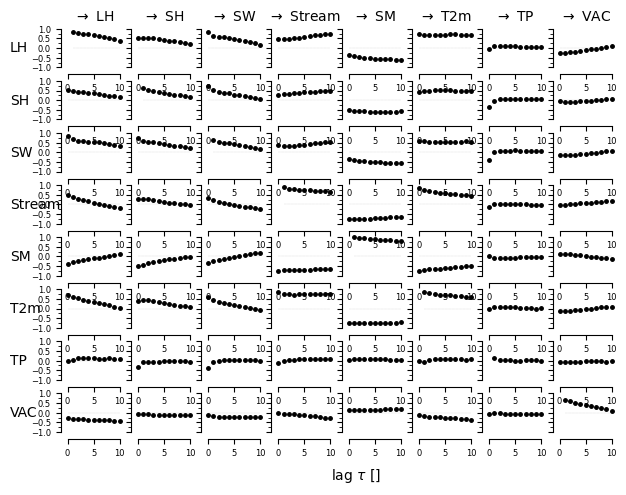

In [ ]:
plot_timeseries_and_correlations(filled_tigramite_df_vac)

#### Inspecting the VAC values

We can now also take a closer look at the expert knowledge labels. According to expert knowledge, there should be three main regimes dominating the system interactions: the normal regime (regime $0$), the moisture-limited (regimes a and c, called dry from now on), and the energy-limited (regimes b and d, called moist from now on). We now inspect how the categories fluctuate monthly.

Prior to inspection, we have recoded the regime names from ```0, a, b, c, d``` to ```0, 1, 2, 3, 4```, respectively.

These expert knowledge labels will also be valuable later when trying to find a set of good hyperparameters for the RPCMCI algorithm.

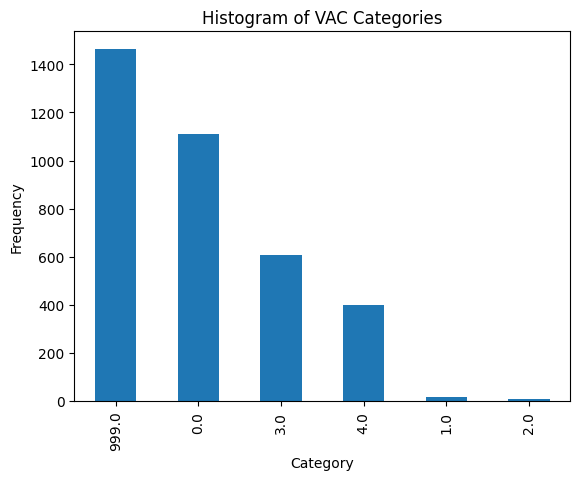

In [ ]:
filled_pd_df_vac['VAC'].value_counts().plot(kind='bar')
plt.title('Histogram of VAC Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

filled_pd_df_vac.index = pd.to_datetime(filled_pd_df_vac.index)

In [ ]:
def group_and_plot_by_month(dataframe):
    # Group by 'Month' and 'VAC', then count occurrences
    monthly_vac_counts = dataframe.groupby(['Month', 'VAC']).size().unstack(fill_value=0)

    # Plotting the aggregated monthly counts as stacked bars
    monthly_vac_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
    plt.title('Monthly Frequency of VAC Categories Aggregated Over Years')
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    plt.legend(title='VAC Category')
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    plt.show()

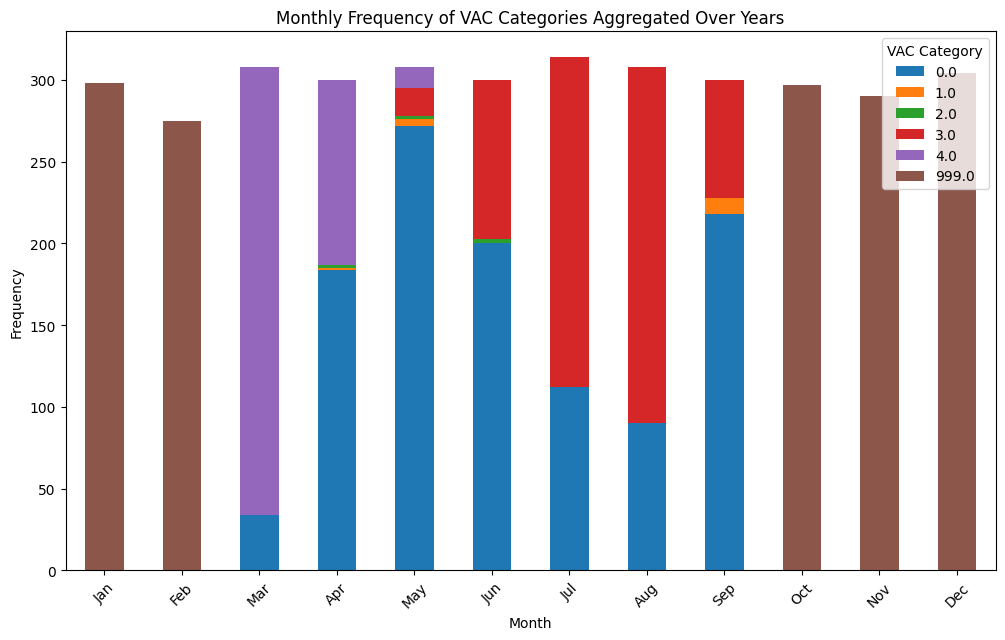

In [ ]:
# Create a 'Month' column by extracting the month from the index
filled_pd_df_vac['Month'] = filled_pd_df_vac.index.month

group_and_plot_by_month(filled_pd_df_vac)


We now group the VAC indices for the dry and the moist regimes such that in the end we obtain $3$ total VAC indices. Then, we plot again the monthly distribution to ensure that we have the correct assignments.

So now the new assignemnt of the regimes is :

0 - normal
1 - dry regime
2 - wet regime

In [ ]:
vac_regimes_reduced = {0: 0, 1: 0, 2: 0, 3: 1, 4: 0}
filled_pd_df_vac['VAC'] = filled_pd_df_vac['VAC'].replace(vac_regimes_reduced).astype(float)

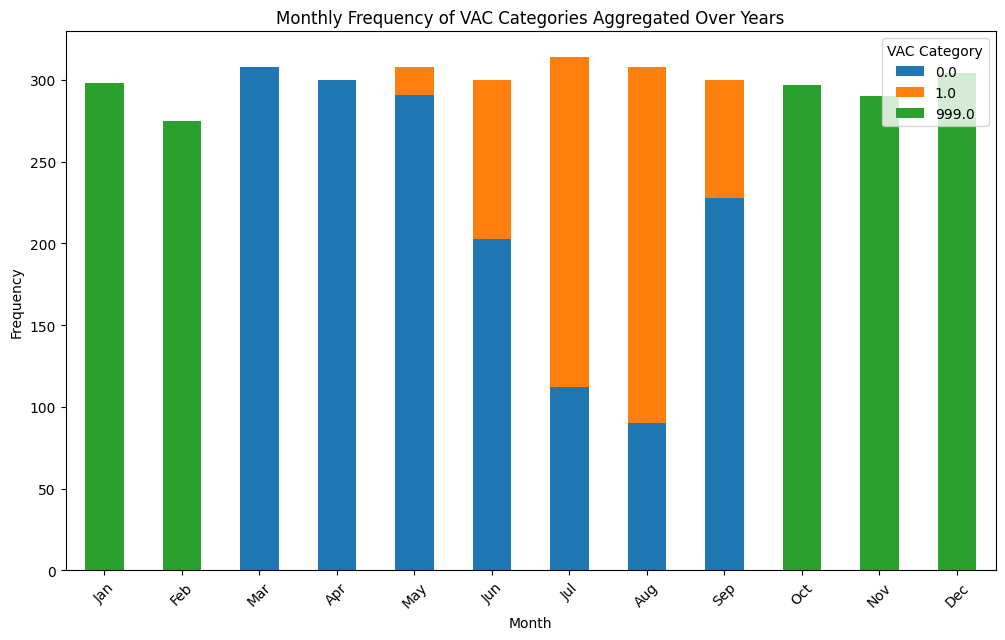

In [ ]:
group_and_plot_by_month(filled_pd_df_vac)

<a name="methodology"></a>
# Methodology

## 5. Applying PCMCI and RPCMCI

Now that we have generated our data and took a closer look at the depenendencies, we can first apply the PCMCI algorithm to the entire dataset at once. This will establish a baseline to compare our discovered regime-specific graphs to, and give us a first idea about how the results of the PCMCI algorithm look like. In the second part of this section, we will apply Regime-PCMCI.

Alternatively, we will use PCMCI and use the VAC values to apply the PCMCI algorithm only on data belonging to a specific regime (which we call masking from now on). This will also serve as a good comparison to our regime-specific graphs. Especially because we do not work with a synthetic dataset, and thus do not have a clear ground-truth, it is important to observe the problem from different perspectives and obtain as much information about the possible causal relationships as we can get.

## 5.1. PCMCI on the entire dataset

### Picking the right conditional independence test
We observe that the total precipitation variable ``tp`` has non-linear relationships with the other variables. The relationship between the other pairs of variables seem to be linear.
This observation is important when trying to run causal discovery because we need to choose the appropriate conditional independence tests. As discussed in the assumptions of constraint-based causal discovery, the assumptions we make about the data guide the choice of our conditional independence test. Tigramite implements a broad set of conditional independence tests. We use the Robust Partial Correlation test, named ``RobustParCorr``, which assumes continuous $X,Y,Z$ with linear dependencies, robust for different marginal distributions; $X,Y$ must be univariate. Despite the non-linear relationships of the precipitation, we choose this test because, as it is parametric, it runs faster than other methods which need to approximate the null-distribution, and because it can work also on computers with less computational resources. However, we are aware that this can be problematic.

We recommend users to re-run this algorithm with the ``CMIknn`` conditinal independence test as well, which assumes continuous $X,Y,Z$ with more general dependencies (permutation-based test); $X,Y$ can be multivariate. However, this will take more computational resources. For other types of conditional independence tests, see the Tigramite documentation.


### Selecting the other hyperparameters
We select $\tau_{\text{max}}$ by inspection of the correlated time lags. Alternatively to investigating the scatter plots and densities above at lag zero, one may choose the lag at which the dependencies have their maximal absolute value. Of course, you might want to use a nonlinear conditional independence test to assess the lags with maximum dependency. I.e., run ``pcmci.get_lagged_dependencies`` with ``PCMCI`` initialized with a nonlinear measure (e.g., CMIknn or GPDC). We will select the time lag as ``tau_max=5``.

The other parameters are:
* ``pc_alpha`` - sets the significance level in the condition-selection step. Here we let PCMCI choose the optimal value by setting it to ``pc_alpha=None``. Then PCMCI will optimize this parameter in the ParCorr case by the Akaike Information criterion among a reasonable default list of values (e.g., ``pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]``)
*  ``alpha_level=0.01`` - indicates that we threshold the resulting p-value matrix at this significance level to obtain the graph
* ``tau_min`` - the minimum time lag to test for CI in PCMCI
* ``tau_max`` - the maxmimum time lag to test for CI in PCMCI


#### Run PCMCI on the 3-day aggregated data

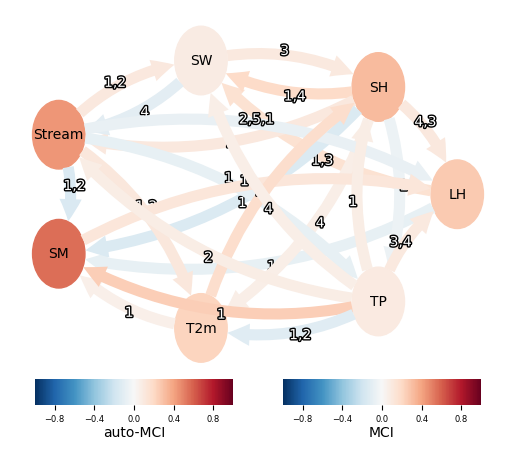

In [ ]:
# Set hyperparameters
tau_min = 1
tau_max = 5
pc_alpha = None
alpha_level = 0.01

pcmci = PCMCI(dataframe=filled_tigramite_df,
              cond_ind_test=RobustParCorr())

pcmci_results = pcmci.run_pcmci(tau_min=tau_min, tau_max=tau_max, pc_alpha=pc_alpha, alpha_level=alpha_level)

tp.plot_graph(val_matrix=pcmci_results['val_matrix'],
              graph=pcmci_results['graph'], var_names=filled_tigramite_df.var_names,
              node_aspect=0.5, node_size=0.5
              )
plt.show()

## 5.2. Regime-PCMCI for constructing causal graphs for different moisture regimes

We now run RPCMCI on our data in order to find the regime assignment. This is encapsulated in the ```run_rpcmci``` function. Here, we have a set of hyperparameters and parameters that we have to set:

* ``num_regimes`` - as we have discussed in the presentation of the RPCMCI algorithm, should be predefined. Since we hypothesize 3 main regimes, we set ``num_regimes=4``, where the fourth regime includes all data points that don't fit any of the three main regimes.
* ``max_transitions`` - this is the number of transitions between regimes, namely $s$ in the description of the RPCMCI algorithm. For this, we actually need to decide on what the average length of a regime would be. We will describe below how we do this. We set this to 200, we explain this choice below.
* ``switch_thres`` - this hyperparameter is used to do the regimes assignment after an iteration, i.e., if $\gamma_{k, i}$ for point $i$ is above threshold ``switch_thres``, then that sample belongs to regime $k$ . We set this to 0.4.
* ``num_iterations`` - the number of iterations for the linear solver. We set here 10.
* ``max_anneal`` - the number of annealings of the optimization problem, i.e. eruns with different - randomized - initial regime-assignments. As discussed in [Saggioro19], where empirical results show that 10 is a good value, we set it 10.
* ``alpha_level`` - the significance level $\alpha$ for the CI tests
* ``tau_min`` - the minimum time lag to test for CI in PCMCI
* ``tau_max`` - the maxmimum time lag to test for CI in PCMCI
* ``link_assumptions`` - these are "hard-coded" known conditional dependence or conditional independence relations (often coming from expert knowledge), which will be fixed during the PCMCI iterations.
*  ``pc_alpha`` - sets the significance level in the condition-selection step. We set this to 0.4.
* ``run_parallel`` - whether the annealings should be parallelized over CPUs. Set to False, set to True if parallization should be on.


Another important choice is the choice of prediction model used for the optimization step. This choice highly depends on the assumptions we can make about the data, similar to the choice of conditional independence test. If we assume that the data has linear relationships, then we can use linear regression. However, if we have non-linear relationships, as is the case for our model, we have to choose a suitable model. Any sklearn model can be used, some examples are k-nearest-neighbors regressors or decision trees. We decide to use a decision tree regressor here [Breiman84].  

In [ ]:
def run_rpcmci(dataframe, num_regimes, max_transitions, switch_thres,
               num_iterations=10, max_anneal=10, alpha_level=0.01,
               tau_min=1, tau_max=5,
               link_assumptions=None,
               pc_alpha=0.4, prediction_model=DecisionTreeRegressor(),
               run_parallel=False):
    # Init RPCMCI with the dataframe, a conditional independence test for use in PCMCI,
    # and a prediction_model which is used to predict each variable given its learned parents. This prediction
    # is then used inside the regime learning optimization step.
    rpcmci = RPCMCI(dataframe=dataframe,
                    cond_ind_test=RobustParCorr(),
                    prediction_model=prediction_model,
                    link_assumptions=link_assumptions,
                    seed=847,
                    run_parallel=run_parallel,
                    verbosity=3)

    # Run RPCMCI
    results = rpcmci.run_rpcmci(
        num_regimes=num_regimes,
        max_transitions=max_transitions,
        num_iterations=num_iterations,
        switch_thres=switch_thres,
        max_anneal=max_anneal,
        tau_min=tau_min,
        tau_max=tau_max,
        pc_alpha=pc_alpha,
        alpha_level=alpha_level,
        n_jobs=-1,
        )

    if results is None:
        print("All annealings resulted in errors. Increase annealing and tune other parameters!")
    else:
        print("Done!")

    return results

#### Defining ``max_transitions``

First, we will find the average sequence length for a single VAC category, as an approximation of the number of time steps for which a regime is active. However, we must pay attention to drop the missing values beforehand. We also integrate the transitional categories 1 and 2 into the one regime, i.e., category 1. We find that on average, a regime is active 5 timesteps, i.e. $4 \cdot 5 = 20$ days. From an expert perspective, this is a plausible value.

Then, using the ``average_sequence_length``, the ``num_regimes``, and the total sample size, we will compute the maximum number of transitions.

In [ ]:
vac_df = pd.DataFrame(filled_vac_values, columns=['VAC'])
vac_df = vac_df[vac_df['VAC'] != 999.]

vac_df['shifted_VAC'] = vac_df['VAC'].shift(-1)  # Shift the category column by one row to compare
vac_df['changed'] = vac_df['VAC'] != vac_df['shifted_VAC']  # True if the next row is a different category

# Calculate sequence lengths
# Assign a group number to each sequence by cumulatively summing the 'is_change' column
vac_df['group'] = vac_df['changed'].cumsum()
# Count the occurrences of each group to get the sequence lengths
sequence_lengths = vac_df.groupby('group').size()

# Step 3: Compute the average sequence length
average_sequence_length = sequence_lengths.mean()

print('Regime average sequence length', average_sequence_length)


Regime average sequence length 5.018779342723005


Setting the number of regimes ``num_regimes=4``, we find the number of maximum transitions ``max_transitions``. However, we note that this is an average duration, and that the regimes are only generated using the thresholds.

In [ ]:
num_regimes = 3
max_transitions = int(
    np.round(vac_df.shape[0] / (average_sequence_length * num_regimes)))
print('Number of max. transitions', max_transitions)

Number of max. transitions 142


In [ ]:
def plot_RPCMCI_results(pd_dataframe, vac_values, results):
    T, N = pd_dataframe.to_numpy().shape
    datatime = np.arange(T)
    regimes = results['regimes'].argmax(axis=0)
    n_regimes = len(results['causal_results'])
    var_names = pd_dataframe.columns
    # Create nice Mosaic plot
    mosaic = [['data %s' % j for i in range(n_regimes)] for j in range(N + 2)]
    for n in range(N):
        mosaic.append(['graph %s' % i for i in range(n_regimes)])

    fig, axs = plt.subplot_mosaic(mosaic=mosaic, figsize=(20, 10))

    for j in range(N):
        ax = axs['data %s' % j]
        ax.axhline(0., color='grey')
        data = copy.deepcopy(pd_dataframe.to_numpy())
        data[data == 999.] = np.nan
        ax.plot(datatime, data[:, j])
        ax.plot(datatime, data[:, j])
        for loc, spine in ax.spines.items():
            if loc != 'left':
                spine.set_color("none")

        ax.xaxis.set_ticks([])
        ax.set_xlim(0., T)
        ax.set_ylabel(pd_dataframe.columns[j])

    # Regime variable
    ax = axs['data %s' % N]
    ax.plot(datatime, regimes.astype('int'), lw=3, color='black')
    for loc, spine in ax.spines.items():
        if loc != 'left':
            spine.set_color("none")
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks(range(n_regimes))
    ax.set_xlim(0., T)
    ax.set_ylabel("Regime")

    # Expert regime GT
    ax = axs['data %s' % (N + 1)]
    vac_values_copy = copy.deepcopy(vac_values)
    vac_values_copy[vac_values_copy == 999.] = np.nan
    ax.plot(datatime, vac_values_copy, lw=3, color='black')
    for loc, spine in ax.spines.items():
        if loc != 'left':
            spine.set_color("none")
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks(range(n_regimes))
    ax.set_xlim(0., T)
    ax.set_ylabel("Expert regime GT")

    # Causal graphs for each regime
    for w in range(n_regimes):
        if w == 0:
            show_colorbar = True
        else:
            show_colorbar = False
        tp.plot_graph(graph=results['causal_results'][w]['graph'],
                      val_matrix=results['causal_results'][w]['val_matrix'],
                      show_colorbar=show_colorbar,
                      var_names=var_names,
                      fig_ax=(fig, axs['graph %s' % w]))
        axs['graph %s' % w].set_title("Regime %d" % w, pad=-4)

    fig.subplots_adjust(hspace=0.6)
    plt.show()

#### Link assumptions

Before we run the algorithm, we take one more step: we define a series of so-called link assumptions, which are hardcoded causal links defined beforehand by the users. For these causal links, conditional independence tests will be skipped. This is done in order to reduce search space of the optimal solution and reduce the number of conditional independence tests. How the use of link assumptions influences the results can be observed in the Results section, where we compare results with and without link assumptions. In this tutorial, however, we will use link assumptions.


To generate these link assumptions, rely on the expert knowledge and include the links depicted with straight lines in the hypothesized graph. These tell us, for example, that the stream function influences both precipitations and the air temperature and that soil moisture is influenced by precipitation.  

We hardcode these links assumptions using the ```create_link_assumptions``` function. For this, we need to specify what the ``tau_min`` and ``tau_max`` for the conditional dependences are, i.e., whether the causal links at $\tau \geq$ ``tau_min`` and $\tau \leq$ ``tau_max``.

We define the links in a dictionary which contains the kind of link between the variables $X_i$ and $X_j$. Here, $i,j$ correspond to the order in which the variables are found in the Tigramite dataframe. Thus, ``link_assumptions`` is a dictionary of the form ``{j:{(i, -tau): link_type, ...}, ...}`` specifying the assumptions about links. Internally, setting this argument initializes the graph with ``graph[i,j,tau] = link_type`` for a dictionary entry ``link_assumptions[j][(i, -tau)] = link_type``. The following specifications are allowed:

-``graph[i,j,0] = '-->'``: an oriented link from i to j at lag 0 exists

-``graph[i,j,0] = '-?>'``: let the method test for an adjacency and if it exists, then its orientation is from i to j at lag 0

-``graph[i,j,0] = 'o-o'``: an adjacency between i and j at lag 0 exists, but let the method determine its orientation

-``graph[i,j,0] = 'o?o'``: let the method test for an adjacency and its orientation (default)

Link assumptions need to be consistent, i.e., ``graph[i,j,0] = '-->'`` requires ``graph[j,i,0] = '<--'`` and acyclicity must hold. If a link does not appear in the dictionary, it is assumed absent. That is, if ``link_assumptions`` is not None, then all links have to be specified or the links are assumed absent.

There might be cases in which you have background knowledge on only a small number of the possible links and it is cumbersome to build the full nested dictionary, where absence of background knowledge needs to be specified by `link_assumptions[j][(i, tau)] = '-?>` for ``tau < 0`` and by `link_assumptions[j][(i, 0)] = 'o?o'` for ``tau = 0``. In such cases, you can use the static convenience function ``pcmci.build_link_assumptions(...)`` in your code or notebook which allows to build the implemented ``link_assumptions`` (which assumes absent entries to be absent links) by ``link_assumptions_absent_link_means_no_knowledge`` (which assumes absent entries are default assumptions about links). However, here we explicitly define all links.

Due to repeated testing, and depending on the computational resources, the algorithm might need a while until it produced results. We have also added a file that contains the results for the RPCMCI run, in case the user wants to jump directly to the evaluation section.

In [ ]:
def create_link_assumptions(tau_min, tau_max, df):
    N = df.values[0].shape[1]

    link_assumptions = {
        j: {} for j in range(N)
    }

    for tau in range(tau_min, tau_max + 1):
        link_assumptions[1][(0, -tau)] = "o?o" #sh o?o lh
        link_assumptions[0][(1, -tau)] = "o?o"
        link_assumptions[0][(4, -tau)] = "o?o" #lh o?o sm
        link_assumptions[4][(0, -tau)] = "o?o"
        link_assumptions[5][(1, -tau)] = "-->"  #sh -> temp

    # add link assumptions for known connections
    # stream -> temp, stream -> tp, stream -> ssrd
    for i in [5, 6, 2]:
        for tau in range(tau_min, tau_max + 1):
            link_assumptions[i][(3, -tau)] = '-->'

    # tp -> soil_moisture
    for tau in range(tau_min, tau_max + 1):
        link_assumptions[4][(6, -tau)] = '-->'

    # sw -> sh, sw -> lh, sm indep stream, sm indep sw
    # 2 -> 1, 2 -> 0
    for i in [0, 1]:
        for tau in range(tau_min, tau_max + 1):
            link_assumptions[i][(2, -tau)] = '-->'


    return link_assumptions

In [ ]:
# create link assumptions
link_assumptions = create_link_assumptions(tau_min, tau_max,
                                           filled_tigramite_df)


### Choose the number of regimes

Lastly, we have to choose the number of regimes. We will search for 3 regimes, and thus set ```num_regimes=3```. The goal is to search for the dry and moist regimes, but allow samples that do not fit into neither of these two to be assigned toa third

### Now we can run RPCMCI

Important! Uncomment the code below if you want to run RPCMCI.

Due to the high computational time, we have uncommented here the code for running RPCMCI, and we make available the results for the configuration below as under the ``'3D-5-False-3-10-142-0.4-False-True-decisionTree-v1-mean-30years-10iterations-noevap-0.4'.npy`` file. However, we encourage users to run the code. Alternatively, users can reduce the number of annealings or iterations. We offer code below with one annealing and one iteration, to prove that the code runs.

In [ ]:
# # run rpcmci - these are the correct hyperparameters for the results we will show below
# rpcmci_results = run_rpcmci(filled_tigramite_df,
#                             num_regimes=3,
#                             max_transitions=max_transitions,
#                             num_iterations=10,
#                             switch_thres=0.4,
#                             max_anneal=10,
#                             link_assumptions=link_assumptions,
#                             prediction_model=DecisionTreeRegressor())

In [ ]:
# # inspect results
# plot_RPCMCI_results(filled_pd_df, filled_vac_values, rpcmci_results)

In [ ]:
# run rpcmci with one annealing and one iteration to show it works
rpcmci_results_one = run_rpcmci(filled_tigramite_df,
                                num_regimes=3,
                                max_transitions=max_transitions,
                                num_iterations=1,
                                switch_thres=0.4,
                                max_anneal=1,
                                link_assumptions=link_assumptions,
                                prediction_model=DecisionTreeRegressor(),
                                run_parallel=False)


################# Annealing iteration a = 0 ####################


###### Optimization step q = 0
################ Regime k = 0


/usr/local/lib/python3.10/dist-packages/tigramite-5.2.5.2-py3.10.egg/tigramite/models.py:2026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


################ Regime k = 1


/usr/local/lib/python3.10/dist-packages/tigramite-5.2.5.2-py3.10.egg/tigramite/models.py:2026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


################ Regime k = 2


/usr/local/lib/python3.10/dist-packages/tigramite-5.2.5.2-py3.10.egg/tigramite/models.py:2026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



Optimal objective: reached.
Difference in abs value between the previous and current gamma (shape num_regimesxT) : 5014.359227716082
Done!


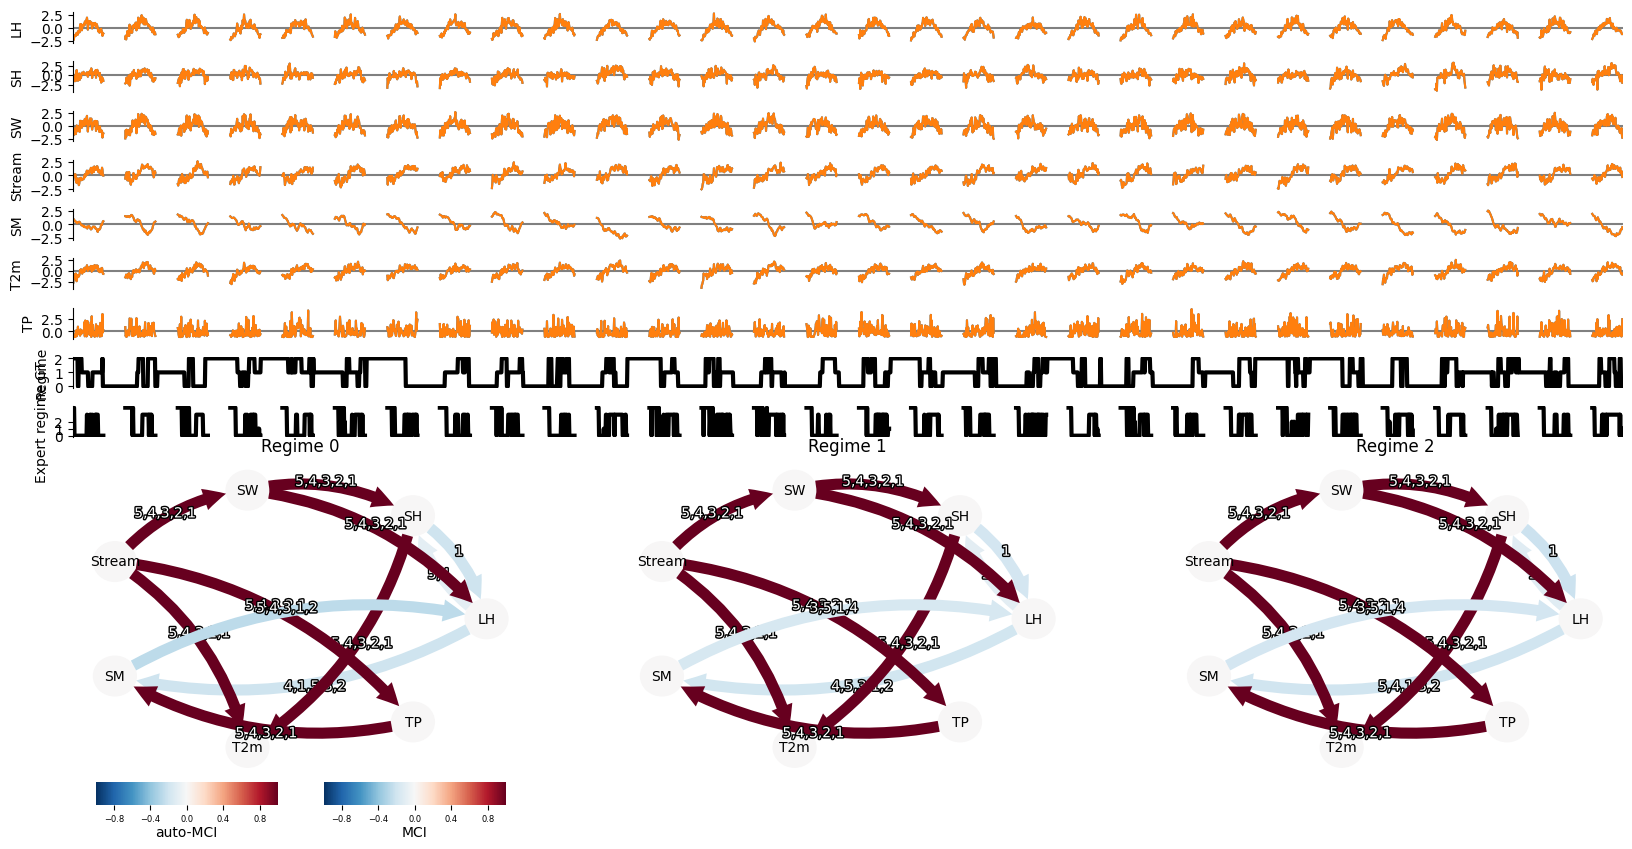

In [ ]:
# inspect results
plot_RPCMCI_results(filled_pd_df, filled_vac_values, rpcmci_results_one)

### 5.3 PCMCI on masked data based on VAC index

Now, we compare the output of Regime-PCMCI to simple masking based on the hypothesized regime variable. The main difference between the two approaches is that Regime-PCMCI also works **without** knowing the regime split beforehand. Rather, it optimizes for differences between causal graphs between potential regimes.
On the other hand, the masking approach lets us incorporate expert knowledge about the regimes.

The main challenge lies in constructing suitable masks for the different regimes. As we briefly mentioned above, we will base these on the hypothesized regime variable "VAC". In tigramite, masks are boolean numpy arrays of the same shape as the data. The value $1$ means that the mask is active, i.e. the corresponding data point should not be included in the analysis. Accordingly, the value $0$ means that the mask is not active.

We will construct one mask per regime and save them in a dictionary.

In [ ]:
nb_regimes = 2
# Construct mask per regime
T, N = filled_tigramite_df.values[0].shape
regime_indicator = filled_vac_values.copy().astype('int')

masks = {i: np.zeros((T, N)) for i in range(nb_regimes)}

for i, day in enumerate(filled_pd_df.index):
    try:
        t = filled_pd_df.index.get_loc(day)
        if t < T:
            for regime in range(nb_regimes):
                if regime_indicator[i] == regime:
                    masks[regime][[t]] = True
    except KeyError:
        print("KeyError")

To get a better feeling for the masks and also for the regime variable "VAC", we take a look at the masked data for regime 0.

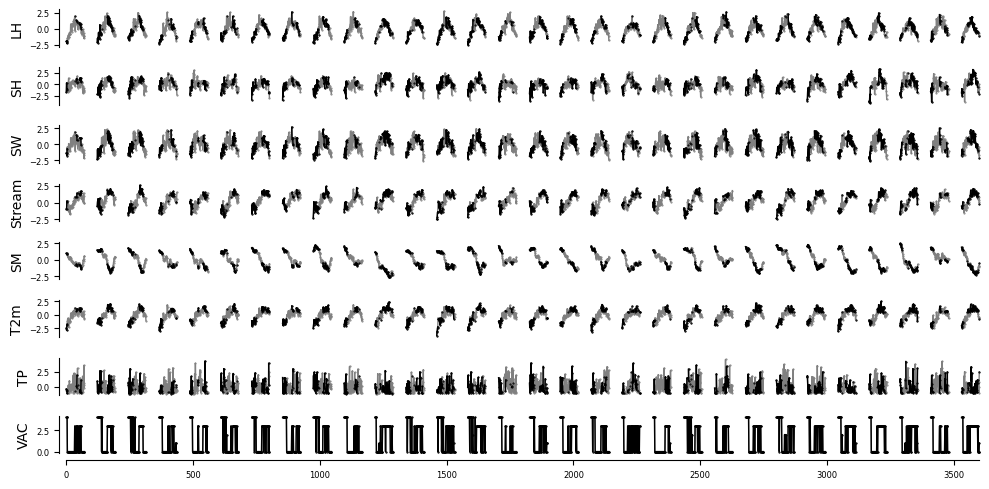

In [ ]:
dataframe_regime = pp.DataFrame(np.hstack((filled_pd_df.to_numpy(), filled_vac_values.reshape(T,1))),
                                missing_flag=999.,
                                var_names=list(filled_pd_df.columns) + ["VAC"],
                                mask=np.hstack((masks[0], np.zeros((T, 1)))))
tp.plot_timeseries(dataframe_regime, grey_masked_samples='data', figsize=(10, 5))
plt.show()

To make the subsequent analysis, we define two functions. One for running PCMCI for a given regime (or masked dataset), and one for plotting the results. Note that we have to pass the argument `mask_type = 'y'` to the conditional independence test that we want to use within PCMCI. This ensures that our mask is being used whenever a masked sample takes on the role of $Y$ in the conditional independence test $X \perp Y | Z$.

In [ ]:
def run(regime_index=0):
    dataframe_regime = pp.DataFrame(filled_pd_df.to_numpy(),
                                    missing_flag=999.,
                                    mask=masks[regime_index])
    pcmci = PCMCI(
        dataframe=dataframe_regime,
        cond_ind_test=ParCorr(significance='analytic', mask_type='y'),
        verbosity=0)

    results = pcmci.run_pcmci(tau_max=tau_max,
                              tau_min=tau_min,
                              pc_alpha=pc_alpha,
                              alpha_level=alpha_level,
                              link_assumptions=link_assumptions)
    return results


def plot_masked_results(masked_results, nb_regimes=2):
    fig, axis = plt.subplots(1, nb_regimes, figsize=(20, 5))
    for r in range(nb_regimes):
        tp.plot_graph(
            val_matrix=masked_results[r]['val_matrix'],
            graph=masked_results[r]['graph'],
            var_names=filled_pd_df.columns,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            show_autodependency_lags=False,
            figsize=(10, 10),
            node_size=0.2,
            fig_ax=(fig, axis[r])
        )

Now, we run PCMCI on the masked regime data and plot the results.

In [ ]:
masked_results = []
for r in range(nb_regimes):
    res = run(regime_index=r)
    masked_results.append(res)

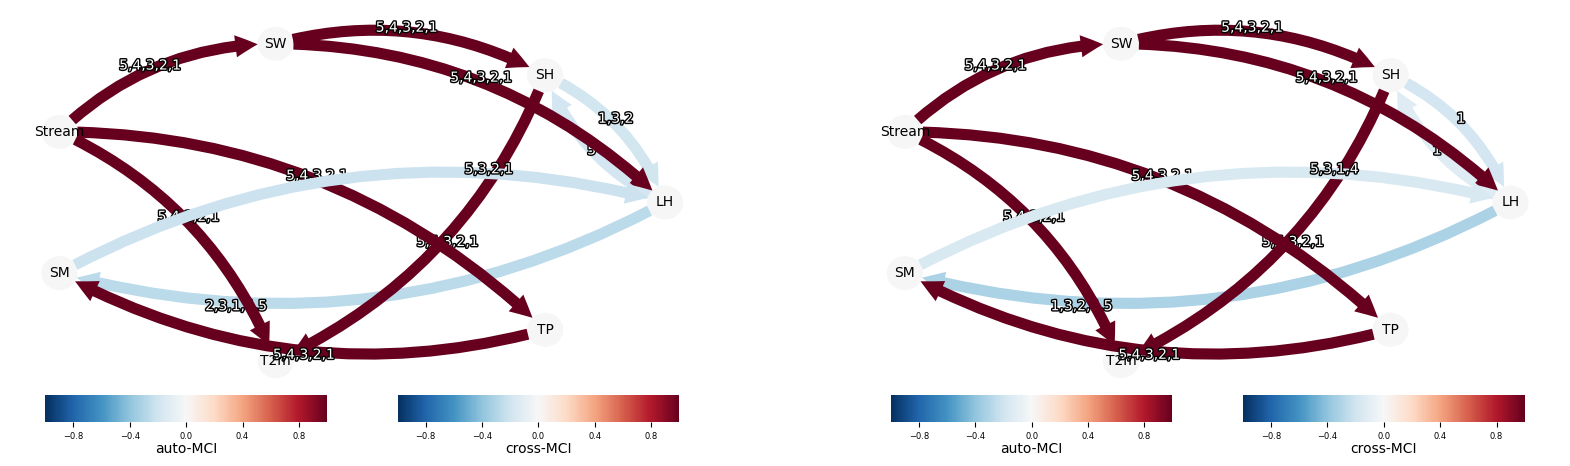

In [ ]:
plot_masked_results(masked_results, nb_regimes)

<a name="results-and-discussion"></a>
# Results & Discussion

First, we replot the results we obtained using PCMCI, RPCMCI, and masking. Then, we discuss these results.

## 6. Results

### 6.1. PCMCI

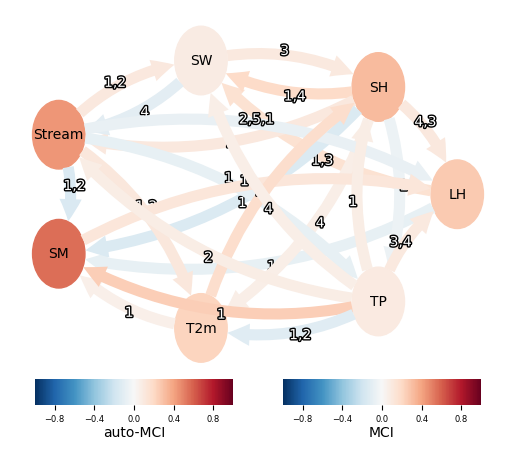

In [ ]:
tp.plot_graph(val_matrix=pcmci_results['val_matrix'],
              graph=pcmci_results['graph'], var_names=filled_tigramite_df.var_names,
              node_aspect=0.5, node_size=0.5
              )
plt.show()

### 6.2. RPCMCI

As described when discussing the use of link assumptions, we computed results for RPCMCI with and without link assumptions, which we present as follows

#### 6.2.1. RPCMCI without link assumptions

In [ ]:
## load existing results if necessary
rpcmci_results_without_link_assumptions = dict(enumerate(np.load('\'3D-5-False-3-10-141-0.4-False-True-decisionTree-30years-10iterations-noevap-0.4-new_la_test\'.npy' , allow_pickle=True).flatten()))[0][0]

In [ ]:
cp = filled_pd_df.copy()
cp.replace(999., np.nan, inplace=True)
filled_for_plotting = filled_vac_values.copy()
filled_for_plotting[filled_for_plotting == 999.] = np.nan

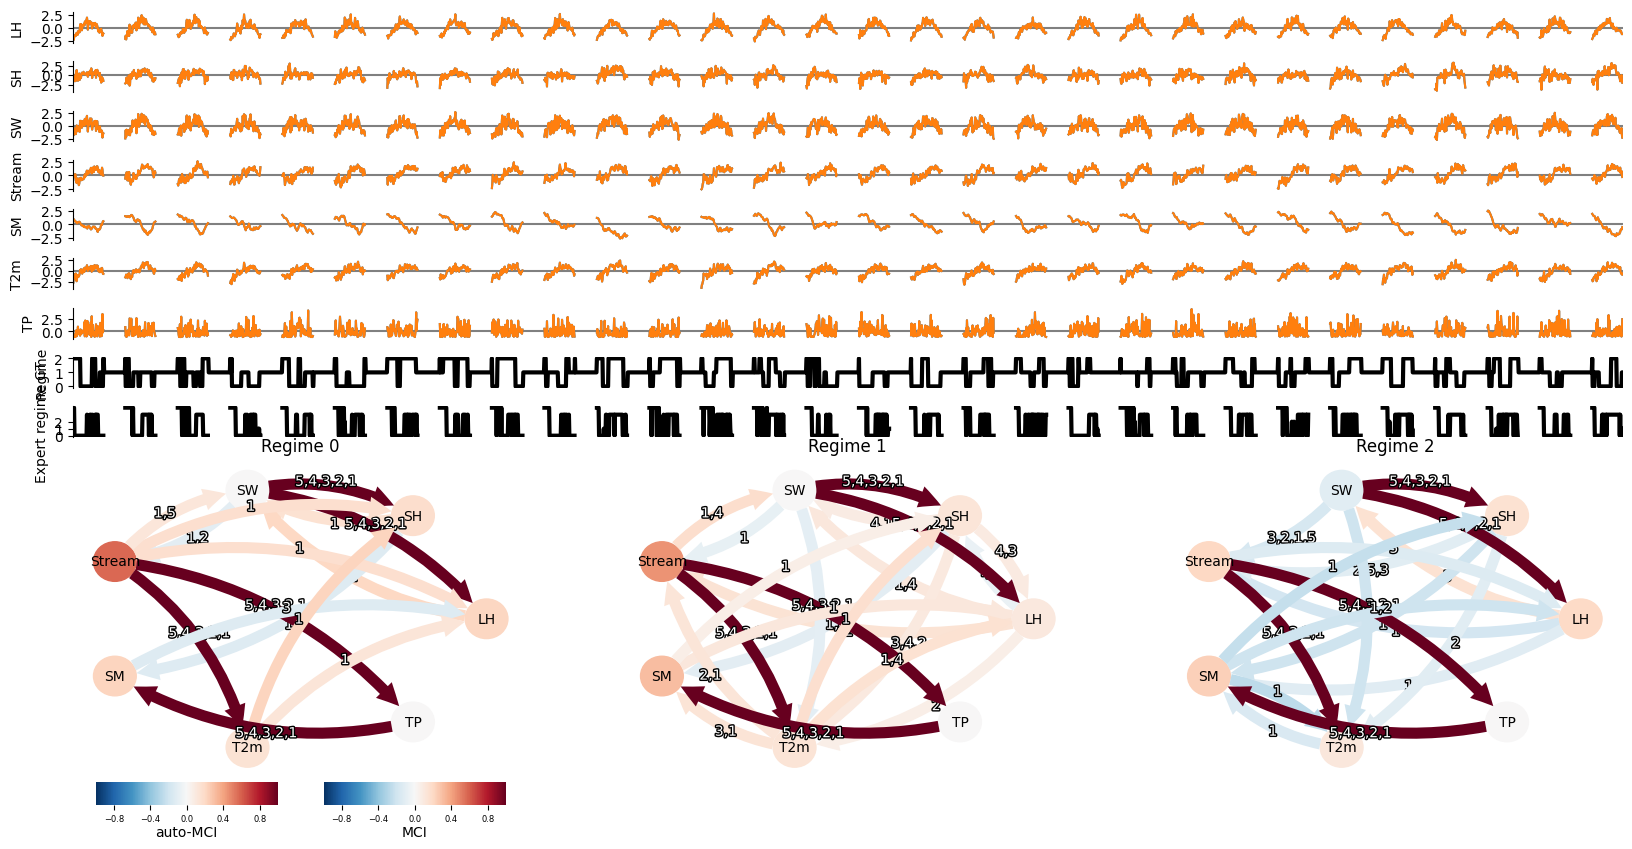

In [ ]:
plot_RPCMCI_results(filled_pd_df, filled_vac_values, rpcmci_results_without_link_assumptions)

#### 6.2.1. RPCMCI with link assumptions

In [ ]:
## load existing results if necessary
rpcmci_results_with_link_assumptions = dict(enumerate(np.load('\'3D-5-False-3-10-142-0.4-False-True-decisionTree-v1-mean-30years-10iterations-noevap-0.4\'.npy' , allow_pickle=True).flatten()))[0][0]

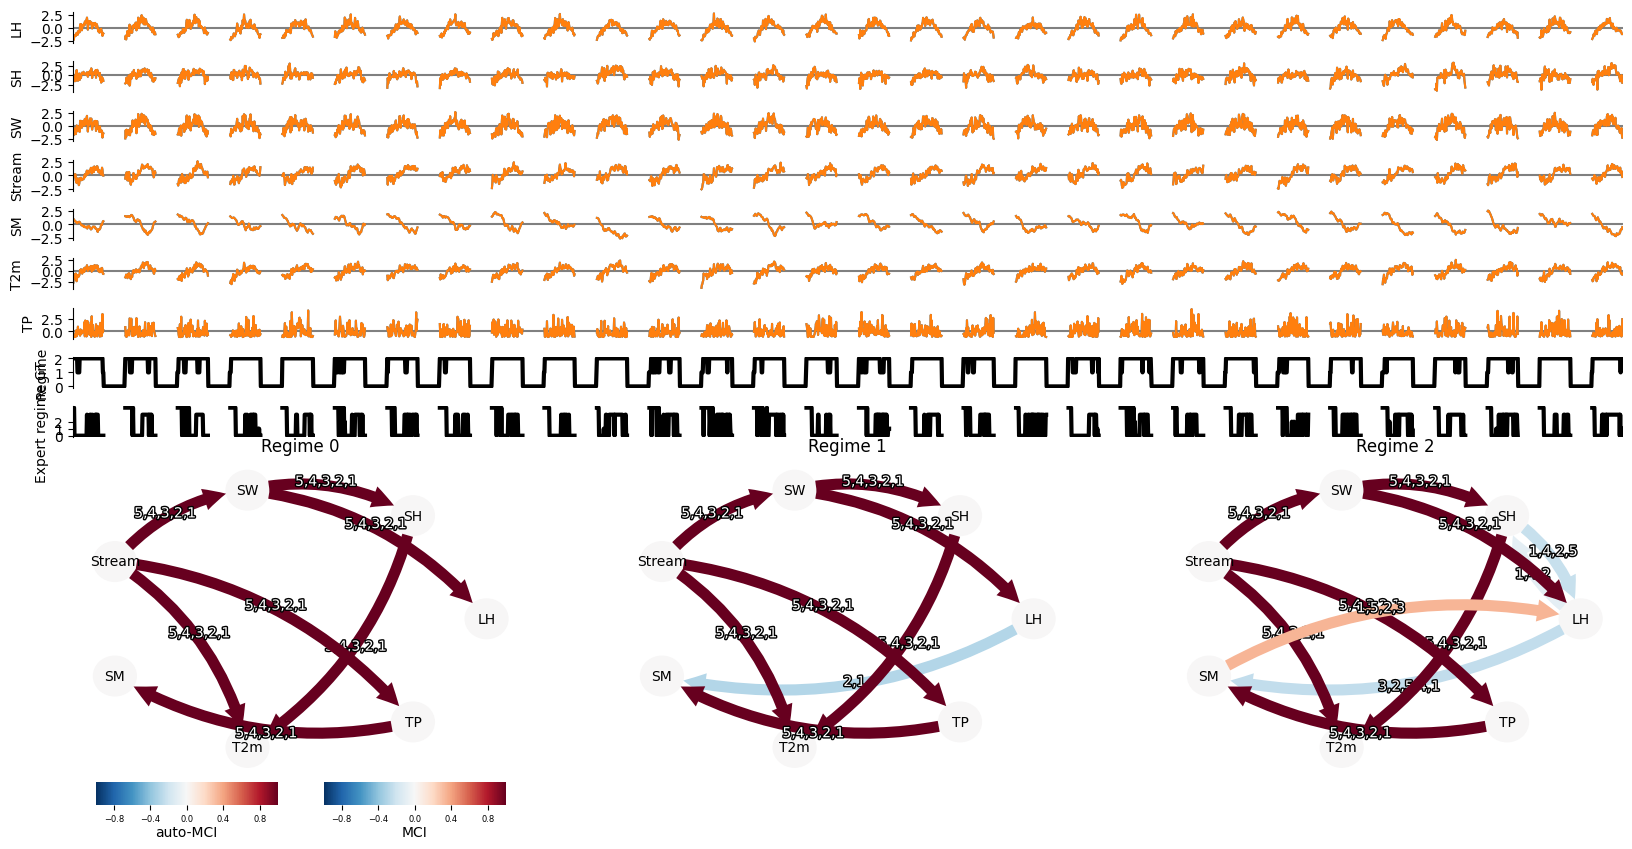

In [ ]:
plot_RPCMCI_results(filled_pd_df, filled_vac_values, rpcmci_results_with_link_assumptions)

### 6.3. PCMCI on masked data

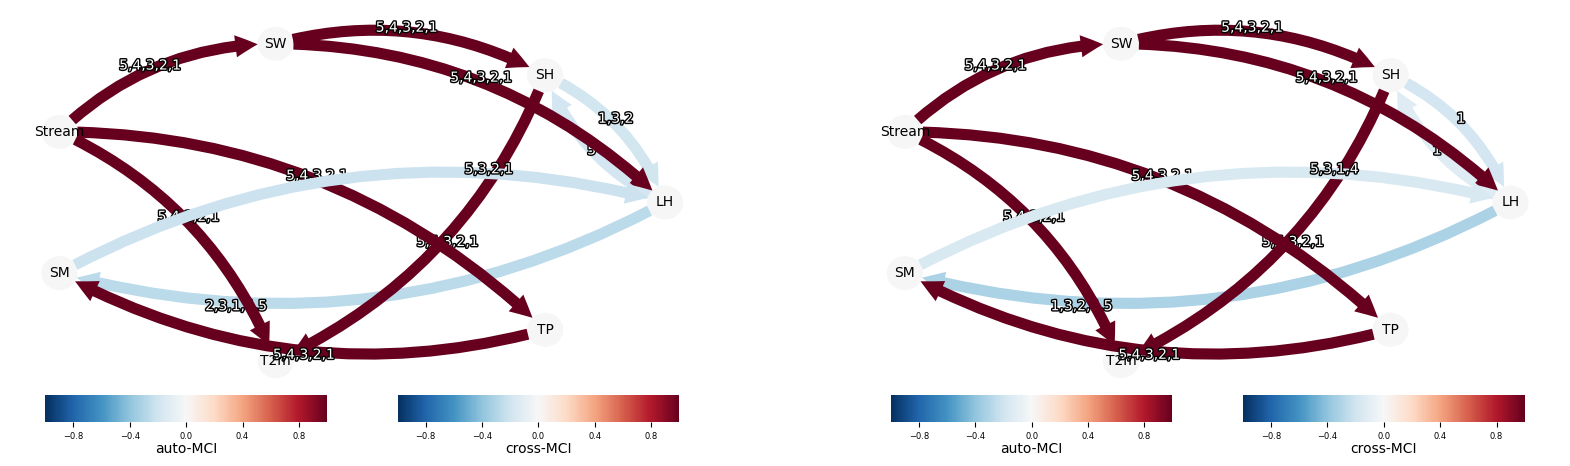

In [ ]:
plot_masked_results(masked_results, nb_regimes)

## 7. Summary and discussion
In this tutorial, we attempt to unravel the dynamics specific to different soil moisture regimes. Under normal conditions, incoming radiation primarily drives evaporation (latent heating), which contributes to soil drying. However, this straightforward relationship between latent heat and soil moisture changes when the soil becomes excessively dry. Under such conditions, the limited availability of water restricts evapotranspiration, consequently shifting the partitioning of incoming radiation towards sensible heat. This shift results in increasingly higher temperatures, which in turn contribute to further soil drying, thereby reinforcing the soil moisture feedback loop.

Uncovering these complex dynamics with observational data is particularly challenging due to the multiple interactions and feedback processes present. This complexity is compounded by the influence of other key variables within the system. For instance, high-pressure anticyclonic circulation—represented here with the stream function variable—tends to favor high temperatures due to clear skies and subsidence, while also reducing precipitation. This creates a negative relationship between soil moisture and temperature. Additionally, rainfall events can occur even during periods of dry soil conditions, affecting latent heat and thus influencing other relationships within the system. Given the highly coupled nature of this system, most studies have focused on applying process-based model experiments rather than data-driven methods to disentangle key physical relationships.

Regime-based causal discovery algorithms applied to time-series datasets offer a promising approach to leverage observational datasets directly, as they attempt to statistically assign causal relationships considering different temporal lags and detect regime shifts in the data. However, our initial tests show that such exercises remain particularly challenging when applied to a strongly coupled and high-dimensional climate system. We encounter multiple links that are difficult to interpret from a physical standpoint. This complexity may be due to limitations in the time aggregations considered here—many relationships are expected to be instantaneous or act on sub-daily timescales. It may also be linked to the inherent limitations of the algorithm explored and/or to the limitations of assumed linear functional relationships between nodes.

We proceed by constraining our system to only discover regime-specific relationships between latent heat, sensible heat, and soil moisture. This approach allows us to leverage physical expectations to simplify the problem while still enabling the algorithm to discover key signature dynamics that characterize the different expected soil moisture regimes. In this case, we find that the algorithm successfully represents the expected structural differences between dry vs. wet conditions. In wet soil moisture conditions (regime 1), there is independence from soil moisture to latent heat. Conversely, in the dry regime (regime 2), this critical link is present, showing how soil moisture can control the incoming energy partitioning and, therefore, temperature levels.



### Discussion about the current state of the results and limitations

This result offers a promising way forward, demonstrating that it is possible to successfully isolate periods in time where limited soil moisture can lead to increased temperatures. The methodological setup we use offers a unique framework to study these intricate feedbacks. It can be used to benchmark climate models in reproducing these sensitivities, compare various regions with respect to underlying key drivers of temperature, and most importantly, improve our understanding with respect to how climate change can modulate the frequency and intensity of these regimes. Many limitations remain, such as the need to highly constrain the system to obtain useful results. We will discuss these in more detail in the following section

#### Limitations

1.  **Assumptions for Causal Discovery**: Causal discovery methods often rely on strong assumptions such as causal sufficiency, i.e., no unmeasured confounders, acyclicity, i.e., no feedback loops, and the Markov condition. Violations of these assumptions can lead to incorrect causal inferences. We cannot exclude the possiblity of unmeasured confounders or feedback loops, especially in such complex systems in Earth science. This is a limitation which is very hard to address.
   
3.  **Conditional Independence Testing Assumptions**: In our tutorial, we assume that all variable have linear relationship, and we include link assumptions for the precipitation variable, which seems to have highly nonlinear relationship, in order to ensure that we are not violating the assumptions for the Robust Partial Correlation conditional independence test. However, this remains a limitation and users must ensure that assumptions are not violated.
4.  **Time-scale Selection**: In complex systems such as Earth, different effects can appear at different time-scales. For example, our initial exploration selects a time-scale where we can assume that no contemporaneous effects might happen. But this can also lead to an incomplete picture of the causal relationships. We will improve upon this in the final version of the tutorial by evaluating different time-scales, i.e., daily, 4-days, weekly. We will also adapt our algorithms accordingly, i.e., use PCMCI+ [Runge20] to allow for contemporanous links.
    
5.  **Complexity and Computation**: The computational complexity of searching for causal structures grows exponentially with the number of variables. This makes it challenging to apply these methods to datasets with a large number of variables. A large number of data points increases can also lead to increased computational complexity, which is why we have limited ourselves to the last 30 years. However, if users have the computational resources, we encourage them to increase the number of years. For the final version of the tutorial, we will also include results on all years. Furthermore, we will use a possibly more efficient solver than the current one, to reduce the computational time. We will also parallelize annealings.
    
6.  **Data Quality and Quantity**: Causal discovery requires high-quality data and, in many cases, large amounts of data to reliably distinguish causal relationships from coincidences or spurious correlations. Furthermore, noisy measurements can also lead to causal discovery methods not picking up the signal correctly, which can lead to false conclusions. Furthermore, non-stationarity from other sources, for example, trends (in Earth science, seasonal trends are very common), can also influence results. Detrending, as we have also done, is an option to remove this noise, but can also remove further significant structural information that may be crucial for identifying causal relationships.
    
7.  **Model and Algorithm Bias**: The choice of causal discovery algorithm and the underlying statistical model can influence the discovered causal structure, potentially introducing bias based on the methodological preferences. Especially for RPCMCI, the choice of an appropriate prediction model is crucial. While we have used decision tree regressors, due to the nonlinear relationships of the precipitation variable, other models might also be appropriate.
    
8.  **Regime Identification and Regime Exogeneity**: Accurately identifying and delineating regimes or conditions under which causal relationships hold can be difficult, especially in complex systems where regimes may overlap or be poorly defined. While we consider that this problem does not apply to our dataset, we encourage users to define very clearly how regimes are defined. Furthermore, as we have already discussed, we assume that the regime variable, which drives the regime shift, is exogeneous. This is a very strong assumption and we believe that, especially in complex systems, this is not always true. However, so far, no algorithm can dead with endogeneous regime variables, and we thus make this strong assumption.
    
9.  **Increased Complexity**: The need to account for varying causal relationships across different regimes adds another layer of complexity to the causal discovery process, increasing the computational and methodological challenges. The number of hyperparameters thus grows. We have run hyperparameter optimization to find a set of adequate parameters, however, we believe that results can be improved by further searching for the adequate hyperparameter setting. For the final version of the tutorial, we will include improved results, if we can find a better hyperparameter configuration.
    
4.  **Sensitivity to Specification**: Especially for the masking approach, the results can be highly sensitive to the specification of regimes and the assumptions about how causal relationships change across these regimes, leading to potential misidentification of causal effects. However, we are currently unaware of a better method to identify regimes using observational data other than thresholding.
    
5.  **Generalizability**: Findings from regime causal discovery may have limited generalizability if the regimes identified in the study do not encompass all possible conditions in which the causal relationships might vary. Especially because we are looking at the last 30 years, where the effects of climate change have been more pronounced, we must pay attention when drawing conclusions, and always consider that we are looking at a restricted period of time. To improve upon this, we will add results from the entire time period in the observational data in the final version of the tutorial.

6. **Strong link assumptions**: To alleviate the problem of nonlinear relationships, and reduce the number of conditional independence tests to be run, we have included link assumptions. While this is generally good practice, as any expert knowledge can guide the algorithm towards a better solution, these assumptions might be strong. Specifically, we have assumed that the links are there at all time lags until $\tau_{\text{max}}$, but this must not be the case. Such subtleties can, however, impact the outcome of the algorithms.

Despite these limitations, causal discovery and regime causal discovery represent significant advancements in understanding complex causal structures. Careful application, robust sensitivity analyses, and integration with domain knowledge can mitigate some of these challenges and enhance the reliability of causal inferences drawn from these methods.


#### Possible extensions and ideas for applications

Our tutorial has the goal to present the causal discovery framework, with a specific focus on causal discovery for systems with regime shifts.

We encourage users to read upon these methods and apply them on their specific problem. Besides the literature references and recommendations below, we consider the [Tigramite tutorials](https://github.com/jakobrunge/tigramite/tree/master/tutorials) a good starting point for a hands-on learning approach.

For users interested in the integration of concepts from causality into ML / DL methods, we consider the ICML 2022 tutorial on "Causality and deep learning" of Nan Rosemary Ke and Stefan Bauer, linked in the further resources below, a good starting point to discover about the intersection of deep learning and causality is discussed at length.



<a name="references"></a>
# References and Resources for further learning

## 8. References and further resources

### 8.1. References

[ArmadasBrás21] Armada Brás, T., Seixas, J.,  Carvalhais, N., Jägermeyr, J. Severity of drought and heatwave crop losses tripled over the last five decades in Europe. Environ. Res. Lett. 16, 065012 (2021). https://doi.org/10.1088/1748-9326/abf004

[Assaad23] Assaad, C.K., Ez-zejjari, I., & Zan, L. (2023). Root Cause Identification for Collective Anomalies in Time Series given an Acyclic Summary Causal Graph with Loops. ArXiv, abs/2303.04038.

[Ballester23]: Ballester, J., Quijal-Zamorano, M., Méndez Turrubiates, R.F. et al. Heat-related mortality in Europe during the summer of 2022. Nat Med 29, 1857–1866 (2023). https://doi.org/10.1038/s41591-023-02419-z

[Breiman84] L. Breiman, J. Friedman, R. Olshen, and C. Stone. (1984).Classification and Regression Trees. Wadsworth, Belmont, CA.

[Budhathoki21] Budhathoki, K., Janzing, D., Bloebaum, P., & Ng, H. (2021). Why did the distribution change? ArXiv, abs/2102.13384.

[Copernicus24]: https://climate.copernicus.eu/warmest-january-record-12-month-average-over-15degc-above-preindustrial

[Dirmeyer21] Benson, D. & Dirmeyer, P. Characterizing the Relationship between Temperature and Soil Moisture Extremes and Their
Role in the Exacerbation of Heat Waves over the Contiguous United States. J. Clim. 34, 2175–2187, doi=10.1175/JCLI-D-20-0440.1, 2021.

[Gissibl15] Gissibl, N., & Kluppelberg, C. (2015). Max-linear models on directed acyclic graphs. Bernoulli.

[Gnecco19] Gnecco, N., Meinshausen, N., Peters, J., & Engelke, S. (2019). Causal discovery in heavy-tailed models. The Annals of Statistics.

[HEATproject]: https://www.ugent.be/en/research/explorer/eu-trackrecord/heu/heu-erc/heat.htm

[Hersbach20] Hersbach, H., Bell, B., Berrisford, P., Hirahara, S., Horányi, A., Muñoz‐Sabater, J., Nicolas, J., Peubey, C., Radu, R., Schepers, D., Simmons, A., Soci, C., Abdalla, S., Abellan, X., Balsamo, G., Bechtold, P., Biavati, G., Bidlot, J., Bonavita, M., Chiara, G.D., Dahlgren, P., Dee, D., Diamantakis, M., Dragani, R., Flemming, J., Forbes, R.G., Fuentes, M., Geer, A.J., Haimberger, L., Healy, S.B., Hogan, R.J., Holm, E.V., Janisková, M., Keeley, S.P., Laloyaux, P., Lopez, P., Lupu, C., Radnoti, G., Rosnay, P.D., Rozum, I., Vamborg, F., Villaume, S., & Thepaut, J. (2020). The ERA5 global reanalysis. Quarterly Journal of the Royal Meteorological Society, 146, 1999 - 2049.

[Lüthi23]: Lüthi, S., Fairless, C., Fischer, E.M. et al. Rapid increase in the risk of heat-related mortality. Nat Commun 14, 4894 (2023). https://doi.org/10.1038/s41467-023-40599-x

[Orth14]: Orth, R., Seneviratne, S.I. Using soil moisture forecasts for sub-seasonal summer temperature predictions in Europe. Clim Dyn 43, 3403–3418 (2014). https://doi.org/10.1007/s00382-014-2112-x

[Peters13] Peters, J., & Buhlmann, P. (2013). Structural Intervention Distance (SID) for Evaluating Causal Graphs. arXiv: Machine Learning.

[Peters17] Peters, J., Janzing, D., & Scholkopf, B. (2017). Elements of Causal Inference: Foundations and Learning Algorithms.

[Röthlisberger23] Röthlisberger, M., & Papritz, L. (2023). Quantifying the physical processes leading to atmospheric hot extremes at a global scale. Nature Geoscience, 16, 210 - 216.

[Runge19] Runge, J., Nowack, P.J., Kretschmer, M., Flaxman, S., & Sejdinovic, D. (2017). Detecting and quantifying causal associations in large nonlinear time series datasets. Science Advances, 5.

[Runge20] Runge, J. (2020). Discovering contemporaneous and lagged causal relations in autocorrelated nonlinear time series datasets. ArXiv, abs/2003.03685.

[RungeMediumPt6] https://medium.com/causality-in-data-science/introducing-conditional-independence-and-causal-discovery-77919db6159c

[Saggioro20] Saggioro, E., de Wiljes, J., Kretschmer, M., & Runge, J. (2020). Reconstructing regime-dependent causal relationships from observational time series. Chaos, 30 11, 113115.

[Schumacher24]: Schumacher, D. L., Zachariah, M., Otto, F., Barnes, C., Philip, S., Kew, S., Vahlberg, M., Singh, R., Heinrich, D., Arrighi, J., van Aalst, M., Hauser, M., Hirschi, M., Bessenbacher, V., Gudmundsson, L., Beaudoing, H. K., Rodell, M., Li, S., Yang, W., Vecchi, G. A., Harrington, L. J., Lehner, F., Balsamo, G., and Seneviratne, S. I.: Detecting the human fingerprint in the summer 2022 western–central European soil drought, Earth Syst. Dynam., 15, 131–154, https://doi.org/10.5194/esd-15-131-2024, 2024.

[Seneviratne10] Seneviratne, S.I., T. Corti, E.L. Davin, M. Hirschi, E.B. Jaeger, I. Lehner, B. Orlowsky, and A.J. Teuling, 2010: Investigating soil moisture-climate interactions in a changing climate: A review. Earth-Science Reviews, 99, 3-4, 125-161, doi:10.1016/j.earscirev.2010.02.004.

[Spirtes93] Spirtes, P., Glymour, C., & Scheines, R. (1993). Causation, prediction, and search.

[Strobl22] Strobl, E.V. (2022). Causal discovery with a mixture of DAGs. Machine Learning, 112, 4201-4225.

[Varambally23] Varambally, S., Ma, Y., & Yu, R. (2023). Discovering Mixtures of Structural Causal Models from Time Series Data. ArXiv, abs/2310.06312.

### 8.2. Further resources

Causality:

* A good introductory book: Peters, J., Janzing, D., & Scholkopf, B. (2017). Elements of Causal Inference: Foundations and Learning Algorithms.
* A hands-on book on causality: Aleksander Molak, Ajit Jaokar. (2023). Causal Inference and Discovery in Python: Unlock the secrets of modern causal machine learning with DoWhy, EconML, PyTorch and more
* Medium articles that introduce the most important concepts in causality: https://medium.com/@jakob_6124
* ICML 2022 Tutorial on "Causality and Deep learning" of Nan Rosemary Ke and Stefan Bauer: https://icml.cc/virtual/2022/tutorial/18442

Soil moisture problem:
* Hsu, Hsin, and Paul A. Dirmeyer. "Soil moisture-evaporation coupling shifts into new gears under increasing CO2." Nature Communications 14.1 (2023): 116.